# <font color='black'> COVID-19 Cases Prediction </font>

For regression, a global COVID-19 dataset, "owid-covid-data.csv", was obtained from https://ourworldindata.org/coronavirus. This project includes: data preparation, initial analysis, exploratory anaysis including Hierarchial and K-Means clustering, feature scaling, feature selection with Recursive Feature Elimination (RFE) using a linear regression algorithm and dimenisionality reduction with Principal Component Analysis (PCA), and building and evaluating the Multilinear, k-Nearest Neighbours (KNN), and Support Vector Machine (SVM) regression models.

Using a global COVID-19 dataset, the aim was to train and test regression models to predict a target variable, 'new_cases' (the number of new cases on a day).  This project looks at the following questions:
    
1) Given information on attributes found in the dataset, could the number of new cases for a country or continent be predicted for a specific date?

2) How did regression models perform on this data in order to predict the number of new cases?  

## Table of Contents

1. [Data Preparation](#a_ID)
    
    1.1 [Missing Values](#a1_ID)
    
    1.2 [Datetime Attribute](#a2_ID)
    
    1.3 [K-Nearest Neighbours (KNN) Imputation](#a3_ID)
    
2. [Visualizations](#b_ID)
    
    2.1 [Univariate Analysis](#b1_ID)
    
    2.2 [Bivariate Analysis](#b2_ID)
    
    2.3 [Correlation Analysis](#b3_ID)
    
    2.4 [Factorizing Categorical Attributes](#b4_ID)
    
3. [Exploratory Analysis](#c_ID)

    5.1 [Hierarchical Clustering](#c1_ID)
    
    5.2 [K-Means Clustering](#c2_ID)
    
4. [Splitting Data into Training and Test Sets](#d_ID)

    4.1 [Feature Scaling](#d1_ID)
    
5. [Dimensionality Reduction](#e_ID)

    5.1 [Recursive Feature Elimination (RFE)](#e1_ID)
    
    5.2 [Principal Component Analysis (PCA)](#e2_ID)

6. [Regression Models](#f_ID)

    6.1 [Multilinear Regression](#f1_ID)
    
    6.2 [K-Nearest Neighbours (KNN) Regression](#f2_ID)
    
    6.3 [Support Vector Machine (SVM) Regression](#f3_ID)

7. [Evaluation of Regression Models](#g_ID)

8. [Conclusion](#h_ID)

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <a id='a_ID'> Data Preparation </a>

In [ ]:
# Load data
covid = pd.read_csv("owid-covid-data.csv")

In [ ]:
# Check dataset
covid.shape

(59921, 50)

There are 59921 records and 50 attributes.

In [ ]:
print(covid.head())
print(covid.tail())
print(covid.sample(5, random_state=1))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-23          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-24          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-25          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-26          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-27          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN   

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59921 entries, 0 to 59920
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            59608 non-null  object 
 1   continent                           59294 non-null  object 
 2   location                            59921 non-null  object 
 3   date                                59921 non-null  object 
 4   total_cases                         51168 non-null  float64
 5   new_cases                           59784 non-null  float64
 6   new_cases_smoothed                  58828 non-null  float64
 7   total_deaths                        43356 non-null  float64
 8   new_deaths                          59784 non-null  float64
 9   new_deaths_smoothed                 58828 non-null  float64
 10  total_cases_per_million             50870 non-null  float64
 11  new_cases_per_million               59471

There are missing values for attributes within the dataset. There are 45 numeric, 4 string and 1 date attributes.

In [ ]:
# Statistics summary for numerical attributes 
print(covid.describe())

        total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  5.116800e+04   59784.000000        58828.000000  4.335600e+04   
mean   2.084572e+05    2115.490733         2093.141627  7.939672e+03   
std    2.008749e+06   20120.379860        19698.294153  6.210412e+04   
min    1.000000e+00  -10034.000000         -525.000000  1.000000e+00   
25%    3.390000e+02       0.000000            0.429000  2.100000e+01   
50%    3.447500e+03      13.000000           18.429000  1.180000e+02   
75%    3.404875e+04     241.250000          260.035750  9.710000e+02   
max    6.323680e+07  671885.000000       593961.143000  1.467987e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  59784.000000         58828.000000             50870.000000   
mean      49.109126            48.979259              3433.308114   
std      410.847769           398.971335              6990.379126   
min    -1918.000000          -232.143000                 0.001000   
25%   

### Check for duplicate records

In [ ]:
covid.duplicated().sum()

0

There are no duplicate records in this dataset.

### <a id='a1_ID'> Missing Values </a>

In [ ]:
# Check for the unique values in each attribute
covid_vars = list(covid.columns)
for i in covid_vars:
    print(i, ":\n", covid[i].unique())

iso_code :
 ['AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI'
 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA'
 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD'
 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK'
 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESH' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA'
 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KNA' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ'
 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL'
 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PNG' 'POL' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU'
 'RUS' 'RWA' 'SAU' 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SMR' 'SOM' 'SRB'
 'SSD' 'STP' 'SUR' 'SVK' 'SVN' 'SWE' 'S

handwashing_facilities :
 [37.746 26.664    nan 94.043 83.241  6.144 11.035 11.877 34.808 97.164
 90.083 25.383 88.469 79.807 16.603 19.351  2.735  4.472 47.964 65.386
 15.574 83.841 85.198 55.182 83.741 80.635 89.827  7.96  41.047 17.45
  7.876  6.403 24.64  76.665 77.159 84.169 22.863 64.204 59.55  94.576
 66.425 98.999 24.651 89.22  66.229 49.839  1.188 87.202  2.117 86.979
 50.54  95.803 87.847 82.502 52.232 79.287 71.18  12.227 15.95   8.704
 44.6    8.978 41.949 47.782 97.4   59.607 78.463 79.602  4.617 23.437
 20.859 35.89  19.275 90.65   9.831 97.719 41.34  67.779 24.097 70.598
  5.818 10.475 90.67  72.704 28.178 89.443 78.687 47.953 21.222 85.847
 25.209 49.542 43.993 13.938 36.791 60.13 ]
hospital_beds_per_thousand :
 [ 0.5      nan  2.89   1.2    5.     4.2    3.8    3.84   7.37   4.7
  0.8    5.64   0.4    7.454  2.     2.9    3.5   11.     1.3    1.1
  2.2    5.8    2.7    1.7    1.8    1.     2.5    4.53   2.11   4.34
  1.71   2.1    1.13   5.2    3.4    6.63   8.     1.4

In [ ]:
# Check for number of missing values
##covid.isnull().any()
covid.isnull().sum(axis=0)

iso_code                                313
continent                               627
location                                  0
date                                      0
total_cases                            8753
new_cases                               137
new_cases_smoothed                     1093
total_deaths                          16565
new_deaths                              137
new_deaths_smoothed                    1093
total_cases_per_million                9051
new_cases_per_million                   450
new_cases_smoothed_per_million         1401
total_deaths_per_million              16850
new_deaths_per_million                  450
new_deaths_smoothed_per_million        1401
reproduction_rate                     19924
icu_patients                          55174
icu_patients_per_million              55174
hosp_patients                         54500
hosp_patients_per_million             54500
weekly_icu_admissions                 59477
weekly_icu_admissions_per_millio

#### ISO_code

In [ ]:
print(covid['iso_code'].isnull().sum())
a = covid[covid['iso_code'].isnull()]
a.head(10)

313


iso_code continent       location        date  total_cases  new_cases  \
59608      NaN       NaN  International  2020-01-23          NaN        0.0   
59609      NaN       NaN  International  2020-01-24          NaN        0.0   
59610      NaN       NaN  International  2020-01-25          NaN        0.0   
59611      NaN       NaN  International  2020-01-26          NaN        0.0   
59612      NaN       NaN  International  2020-01-27          NaN        0.0   
59613      NaN       NaN  International  2020-01-28          NaN        0.0   
59614      NaN       NaN  International  2020-01-29          NaN        0.0   
59615      NaN       NaN  International  2020-01-30          NaN        0.0   
59616      NaN       NaN  International  2020-01-31          NaN        0.0   
59617      NaN       NaN  International  2020-02-01          NaN        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
59608                 NaN           NaN         0.0                  NaN  ...   
59609                 NaN           NaN         0.0                  NaN  ...   
59610                 NaN           NaN         0.0                  NaN  ...   
59611                 NaN           NaN         0.0                  NaN  ...   
59612                 NaN           NaN         0.0                  NaN  ...   
59613                 0.0           NaN         0.0                  0.0  ...   
59614                 0.0           NaN         0.0                  0.0  ...   
59615                 0.0           NaN         0.0                  0.0  ...   
59616                 0.0           NaN         0.0                  0.0  ...   
59617                 0.0           NaN         0.0                  0.0  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
59608             NaN              NaN                    NaN   
59609             NaN              NaN                    NaN   
59610             NaN              NaN                    NaN   
59611             NaN              NaN                    NaN   
59612             NaN              NaN                    NaN   
59613             NaN              NaN                    NaN   
59614             NaN              NaN                    NaN   
59615             NaN              NaN                    NaN   
59616             NaN              NaN                    NaN   
59617             NaN              NaN                    NaN   

       diabetes_prevalence  female_smokers  male_smokers  \
59608                  NaN             NaN           NaN   
59609                  NaN             NaN           NaN   
59610                  NaN             NaN           NaN   
59611                  NaN             NaN           NaN   
59612                  NaN             NaN           NaN   
59613                  NaN             NaN           NaN   
59614                  NaN             NaN           NaN   
59615                  NaN             NaN           NaN   
59616                  NaN             NaN           NaN   
59617                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
59608                     NaN                         NaN              NaN   
59609                     NaN                         NaN              NaN   
59610                     NaN                         NaN              NaN   
59611                     NaN                         NaN              NaN   
59612                     NaN                         NaN              NaN   
59613                     NaN                         NaN              NaN   
59614                     NaN                         NaN              NaN   
59615                     NaN                         NaN              NaN   
59616                     NaN                         NaN              NaN   
59617                     NaN                         NaN              NaN   

       h

In [ ]:
len(a[a['location'] == "International"])

313

All of the missing values in 'iso_code' occurred when 'location' was "International".  Since 'iso_code' and 'location' both indicate the country of a record and 'iso_code' initially has 313 missing values and 'location' has 0 missing values, the 'iso_code' attribute can be dropped.

In [ ]:
covid = covid.drop('iso_code', axis=1)

In [ ]:
covid.shape

(59921, 49)

#### Continent

In [ ]:
print(covid['continent'].isnull().sum())
b = covid[covid['continent'].isnull()]
b

627


continent       location        date  total_cases  new_cases  \
59294       NaN          World  2020-01-22        555.0        0.0   
59295       NaN          World  2020-01-23        654.0       99.0   
59296       NaN          World  2020-01-24        941.0      287.0   
59297       NaN          World  2020-01-25       1434.0      493.0   
59298       NaN          World  2020-01-26       2118.0      684.0   
...         ...            ...         ...          ...        ...   
59916       NaN  International  2020-11-26        721.0        0.0   
59917       NaN  International  2020-11-27        721.0        0.0   
59918       NaN  International  2020-11-28        721.0        0.0   
59919       NaN  International  2020-11-29        721.0        0.0   
59920       NaN  International  2020-11-30        721.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
59294                 NaN          17.0         0.0                  NaN   
59295                 NaN          18.0         1.0                  NaN   
59296                 NaN          26.0         8.0                  NaN   
59297                 NaN          42.0        16.0                  NaN   
59298                 NaN          56.0        14.0                  NaN   
...                   ...           ...         ...                  ...   
59916                 0.0          15.0         0.0                  0.0   
59917                 0.0          15.0         0.0                  0.0   
59918                 0.0          15.0         0.0                  0.0   
59919                 0.0          15.0         0.0                  0.0   
59920                 0.0          15.0         0.0                  0.0   

       total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
59294                    0.071  ...       15469.207             10.0   
59295                    0.084  ...       15469.207             10.0   
59296                    0.121  ...       15469.207             10.0   
59297                    0.184  ...       15469.207             10.0   
59298                    0.272  ...       15469.207             10.0   
...                        ...  ...             ...              ...   
59916                      NaN  ...             NaN              NaN   
59917                      NaN  ...             NaN              NaN   
59918                      NaN  ...             NaN              NaN   
59919                      NaN  ...             NaN              NaN   
59920                      NaN  ...             NaN              NaN   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
59294                 233.07                 8.51           6.434   
59295                 233.07                 8.51           6.434   
59296                 233.07                 8.51           6.434   
59297                 233.07                 8.51           6.434   
59298                 233.07                 8.51           6.434   
...                      ...                  ...             ...   
59916                    NaN                  NaN             NaN   
59917                    NaN                  NaN             NaN   
59918                    NaN                  NaN             NaN   
59919                    NaN                  NaN             NaN   
59920                    NaN                  NaN             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
59294        34.635                   60.13                       2.705   
59295        34.635                   60.13                       2.705   
59296        34.635                   60.13                       2.705   
59297        34.635                   60.13                       2.705   
59298        34.635                   60.13                       2.705   
...             ...                     ...                         ...   
59916           NaN              

In [ ]:
len_world = len(b[b['location'] == "World"])
len_intrnl = len(b[b['location'] == "International"])
lngth = len_world + len_intrnl
print(len_world, "missing values in 'continent' had 'World' location.")
print(len_intrnl, "missing values in 'continent' had 'International' location.")
print("Of", len(b), "missing values in 'continent',", lngth, "had 'location' as either 'World' or 'International'.")

314 missing values in 'continent' had 'World' location.
313 missing values in 'continent' had 'International' location.
Of 627 missing values in 'continent', 627 had 'location' as either 'World' or 'International'.


We can substitute missing 'continent' values with the corresponding location ('World' or 'International').

In [ ]:
covid.dropna(subset=['continent'], inplace=True)

In [ ]:
covid['continent'][covid['continent'].isnull()] = covid['location'][covid['continent'].isnull()]

C:\Users\sanje\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sum(covid['continent'].isnull())

0

In [ ]:
covid['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'South America', 'North America',
       'Oceania'], dtype=object)

In [ ]:
covid.shape

(59294, 49)

#### Tests Units

In [ ]:
print(covid['tests_units'].isnull().sum())
c = covid[covid['tests_units'].isnull()]
c.head(10)

32031


continent     location        date  total_cases  new_cases  \
0      Asia  Afghanistan  2020-01-23          NaN        0.0   
1      Asia  Afghanistan  2020-01-24          NaN        0.0   
2      Asia  Afghanistan  2020-01-25          NaN        0.0   
3      Asia  Afghanistan  2020-01-26          NaN        0.0   
4      Asia  Afghanistan  2020-01-27          NaN        0.0   
5      Asia  Afghanistan  2020-01-28          NaN        0.0   
6      Asia  Afghanistan  2020-01-29          NaN        0.0   
7      Asia  Afghanistan  2020-01-30          NaN        0.0   
8      Asia  Afghanistan  2020-01-31          NaN        0.0   
9      Asia  Afghanistan  2020-02-01          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         0.0                  NaN   
1                 NaN           NaN         0.0                  NaN   
2                 NaN           NaN         0.0                  NaN   
3                 NaN           NaN         0.0                  NaN   
4                 NaN           NaN         0.0                  NaN   
5                 0.0           NaN         0.0                  0.0   
6                 0.0           NaN         0.0                  0.0   
7                 0.0           NaN         0.0                  0.0   
8                 0.0           NaN         0.0                  0.0   
9                 0.0           NaN         0.0                  0.0   

   total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
0                      NaN  ...        1803.987              NaN   
1                      NaN  ...        1803.987              NaN   
2                      NaN  ...        1803.987              NaN   
3                      NaN  ...        1803.987              NaN   
4                      NaN  ...        1803.987              NaN   
5                      NaN  ...        1803.987              NaN   
6                      NaN  ...        1803.987              NaN   
7                      NaN  ...        1803.987              NaN   
8                      NaN  ...        1803.987              NaN   
9                      NaN  ...        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   
5                597.029                 9.59             NaN           NaN   
6                597.029                 9.59             NaN           NaN   
7                597.029                 9.59             NaN           NaN   
8                597.029                 9.59             NaN           NaN   
9                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   
5                  37.746                         0.5            64.83   
6                  37.746                         0.5            64.83   
7                  37.746                         0.5            64.83   
8                  37.746                         0.5            64.83   
9                  37.746                         0.5            64.83   

   human_development_index  
0                    0.498  
1           

In [ ]:
# Replace missing values for 'tests_units' with 'unknown'
covid['tests_units'][covid['tests_units'].isnull()] = "unknown"

C:\Users\sanje\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(covid['tests_units'].isnull().sum())
covid['tests_units'].value_counts()

0


unknown            32031
tests performed    16289
people tested       5387
samples tested      5008
units unclear        579
Name: tests_units, dtype: int64

### <a id='a2_ID'> Datetime Attribute </a>

In [ ]:
# Check type of 'date' attribute
print(covid['date'].dtype)

object


In [ ]:
# Change 'date' type to datetime
covid['date'] = pd.to_datetime(covid['date'])
print(covid['date'].dtype)

datetime64[ns]


Extracting 'month', 'day' and 'days_from_startdate' information from 'date' for new attributes.

In [ ]:
# Checking 'date' attribute
covid['date']

0       2020-01-23
1       2020-01-24
2       2020-01-25
3       2020-01-26
4       2020-01-27
           ...    
59289   2020-11-26
59290   2020-11-27
59291   2020-11-28
59292   2020-11-29
59293   2020-11-30
Name: date, Length: 59294, dtype: datetime64[ns]

In [ ]:
# Extracting 'month' and 'day' to make new attributes
covid['month'] = covid['date'].dt.month
covid['day'] = covid['date'].dt.day

In [ ]:
# Add new 'days_from_startdate' attribute using 'date' to get number of days since the earliest date recorded in the dataset
print("The earliest date is", covid['date'].min())
print("The latest date is", covid['date'].max())

The earliest date is 2020-01-01 00:00:00
The latest date is 2020-12-01 00:00:00


Therefore, the 'date' attribute is converted into number of days since the earliest date in the dataset, 2020-01-01.

In [ ]:
from datetime import date
covid['days_from_startdate'] = (covid['date'] - covid['date'].min()).dt.days

In [ ]:
covid['days_from_startdate']

0         22
1         23
2         24
3         25
4         26
        ... 
59289    330
59290    331
59291    332
59292    333
59293    334
Name: days_from_startdate, Length: 59294, dtype: int64

In [ ]:
covid.shape

(59294, 52)

This dataframe now has 59294 records and 52 attributes.

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59294 entries, 0 to 59293
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   continent                           59294 non-null  object        
 1   location                            59294 non-null  object        
 2   date                                59294 non-null  datetime64[ns]
 3   total_cases                         50556 non-null  float64       
 4   new_cases                           59157 non-null  float64       
 5   new_cases_smoothed                  58212 non-null  float64       
 6   total_deaths                        42757 non-null  float64       
 7   new_deaths                          59157 non-null  float64       
 8   new_deaths_smoothed                 58212 non-null  float64       
 9   total_cases_per_million             50556 non-null  float64       
 10  new_cases_per_million 

In [ ]:
# Percentage of Missing Values Per Attribute
covid.isnull().sum(axis=0)/len(covid)

continent                             0.000000
location                              0.000000
date                                  0.000000
total_cases                           0.147367
new_cases                             0.002311
new_cases_smoothed                    0.018248
total_deaths                          0.278898
new_deaths                            0.002311
new_deaths_smoothed                   0.018248
total_cases_per_million               0.147367
new_cases_per_million                 0.002311
new_cases_smoothed_per_million        0.018248
total_deaths_per_million              0.278898
new_deaths_per_million                0.002311
new_deaths_smoothed_per_million       0.018248
reproduction_rate                     0.330556
icu_patients                          0.919941
icu_patients_per_million              0.919941
hosp_patients                         0.908574
hosp_patients_per_million             0.908574
weekly_icu_admissions                 0.992512
weekly_icu_ad

Variables with more than 50% missing values would be dropped.

In [ ]:
cols_to_drop = list(covid.columns[covid.isnull().sum(axis=0)/len(covid) > 0.5])
print(len(cols_to_drop))
print(cols_to_drop)

17
['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'handwashing_facilities']


In [ ]:
covid2 = covid.copy()

In [ ]:
for i in cols_to_drop:
    covid2 = covid2.drop(i, axis=1)

In [ ]:
covid2.shape

(59294, 35)

Now, there are 35 attributes in the dataset.

In [ ]:
covid2.head()

continent     location       date  total_cases  new_cases  \
0      Asia  Afghanistan 2020-01-23          NaN        0.0   
1      Asia  Afghanistan 2020-01-24          NaN        0.0   
2      Asia  Afghanistan 2020-01-25          NaN        0.0   
3      Asia  Afghanistan 2020-01-26          NaN        0.0   
4      Asia  Afghanistan 2020-01-27          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         0.0                  NaN   
1                 NaN           NaN         0.0                  NaN   
2                 NaN           NaN         0.0                  NaN   
3                 NaN           NaN         0.0                  NaN   
4                 NaN           NaN         0.0                  NaN   

   total_cases_per_million  ...  cardiovasc_death_rate  diabetes_prevalence  \
0                      NaN  ...                597.029                 9.59   
1                      NaN  ...                597.029                 9.59   
2                      NaN  ...                597.029                 9.59   
3                      NaN  ...                597.029                 9.59   
4                      NaN  ...                597.029                 9.59   

   female_smokers  male_smokers  hospital_beds_per_thousand  life_expectancy  \
0             NaN           NaN                         0.5            64.83   
1             NaN           NaN                         0.5            64.83   
2             NaN           NaN                         0.5            64.83   
3             NaN           NaN                         0.5            64.83   
4             NaN           NaN                         0.5            64.83   

  human_development_index  month  day  days_from_startdate  
0                   0.498      1   23                   22  
1                   0.498      1   24                   23  
2                   0.498      1   25                   24  
3                   0.498      1   26                   25  
4                   0.498      1   27                   26  

[5 rows x 35 columns]

In [ ]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59294 entries, 0 to 59293
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   continent                        59294 non-null  object        
 1   location                         59294 non-null  object        
 2   date                             59294 non-null  datetime64[ns]
 3   total_cases                      50556 non-null  float64       
 4   new_cases                        59157 non-null  float64       
 5   new_cases_smoothed               58212 non-null  float64       
 6   total_deaths                     42757 non-null  float64       
 7   new_deaths                       59157 non-null  float64       
 8   new_deaths_smoothed              58212 non-null  float64       
 9   total_cases_per_million          50556 non-null  float64       
 10  new_cases_per_million            59157 non-null  float64  

### <a id='a3_ID'> k-Nearest Neighbours (KNN) Imputation </a>

Missing values for numerical attributes in the dataset were imputed using KNN imputation with 3 number of neighbours (k).

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
print(covid2.columns)

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'month', 'day', 'days_from_startdate'],
      dtype='object')


In [ ]:
# Data frame with numerical attributes
numeric_data1 = pd.DataFrame(covid2.iloc[:, 3:16])
numeric_data2 = pd.DataFrame(covid2.iloc[:, 17:])
numeric_data = pd.concat([numeric_data1, numeric_data2], sort=False, axis=1)
print(numeric_data.head())
##len(numeric_data)

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0          NaN        0.0                 NaN           NaN         0.0   
1          NaN        0.0                 NaN           NaN         0.0   
2          NaN        0.0                 NaN           NaN         0.0   
3          NaN        0.0                 NaN           NaN         0.0   
4          NaN        0.0                 NaN           NaN         0.0   

   new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0                  NaN                      NaN                    0.0   
1                  NaN                      NaN                    0.0   
2                  NaN                      NaN                    0.0   
3                  NaN                      NaN                    0.0   
4                  NaN                      NaN                    0.0   

   new_cases_smoothed_per_million  total_deaths_per_million  ...  \
0                             NaN   

In [ ]:
knn_imputer = KNNImputer(n_neighbors=3)

In [ ]:
numeric_data = pd.DataFrame(knn_imputer.fit_transform(numeric_data), columns=numeric_data.columns)

In [ ]:
print(len(numeric_data))
numeric_data.shape

59294


(59294, 31)

In [ ]:
covid2.shape

(59294, 35)

In [ ]:
numeric_data.head()

total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0          1.0        0.0                 0.0      1.333333         0.0   
1          1.0        0.0                 0.0      1.333333         0.0   
2          1.0        0.0                 0.0      1.333333         0.0   
3          1.0        0.0                 0.0      1.333333         0.0   
4          1.0        0.0                 0.0      1.333333         0.0   

   new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0                  0.0                    0.026                    0.0   
1                  0.0                    0.026                    0.0   
2                  0.0                    0.026                    0.0   
3                  0.0                    0.026                    0.0   
4                  0.0                    0.026                    0.0   

   new_cases_smoothed_per_million  total_deaths_per_million  ...  \
0                             0.0                  0.034333  ...   
1                             0.0                  0.034333  ...   
2                             0.0                  0.034333  ...   
3                             0.0                  0.034333  ...   
4                             0.0                  0.034333  ...   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59            23.3          33.1   
1                597.029                 9.59            23.3          33.1   
2                597.029                 9.59            23.3          33.1   
3                597.029                 9.59            23.3          33.1   
4                597.029                 9.59            23.3          33.1   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.498   
1                         0.5            64.83                    0.498   
2                         0.5            64.83                    0.498   
3                         0.5            64.83                    0.498   
4                         0.5            64.83                    0.498   

   month   day  days_from_startdate  
0    1.0  23.0                 22.0  
1    1.0  24.0                 23.0  
2    1.0  25.0                 24.0  
3    1.0  26.0                 25.0  
4    1.0  27.0                 26.0  

[5 rows x 31 columns]

In [ ]:
# Recombining data frames
covid_data1 = pd.DataFrame(covid2.iloc[:, :3])
covid_data2 = pd.DataFrame(covid2.iloc[:, 16])
covid3 = pd.DataFrame(pd.concat([numeric_data, covid_data1, covid_data2], sort=False, axis=1), columns=covid2.columns)

In [ ]:
covid3.head()

continent     location       date  total_cases  new_cases  \
0      Asia  Afghanistan 2020-01-23          1.0        0.0   
1      Asia  Afghanistan 2020-01-24          1.0        0.0   
2      Asia  Afghanistan 2020-01-25          1.0        0.0   
3      Asia  Afghanistan 2020-01-26          1.0        0.0   
4      Asia  Afghanistan 2020-01-27          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 0.0      1.333333         0.0                  0.0   
1                 0.0      1.333333         0.0                  0.0   
2                 0.0      1.333333         0.0                  0.0   
3                 0.0      1.333333         0.0                  0.0   
4                 0.0      1.333333         0.0                  0.0   

   total_cases_per_million  ...  cardiovasc_death_rate  diabetes_prevalence  \
0                    0.026  ...                597.029                 9.59   
1                    0.026  ...                597.029                 9.59   
2                    0.026  ...                597.029                 9.59   
3                    0.026  ...                597.029                 9.59   
4                    0.026  ...                597.029                 9.59   

   female_smokers  male_smokers  hospital_beds_per_thousand  life_expectancy  \
0            23.3          33.1                         0.5            64.83   
1            23.3          33.1                         0.5            64.83   
2            23.3          33.1                         0.5            64.83   
3            23.3          33.1                         0.5            64.83   
4            23.3          33.1                         0.5            64.83   

  human_development_index  month   day  days_from_startdate  
0                   0.498    1.0  23.0                 22.0  
1                   0.498    1.0  24.0                 23.0  
2                   0.498    1.0  25.0                 24.0  
3                   0.498    1.0  26.0                 25.0  
4                   0.498    1.0  27.0                 26.0  

[5 rows x 35 columns]

In [ ]:
# Checking to see if there are any more missing values
covid3.isnull().sum()

continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
f

In [ ]:
### Check for any duplicate values
covid3.duplicated().sum()

0

## <a id='b_ID'> Visualizations </a>

Count plots, histograms, boxplots, violin plots, bar plots, line plots, pair plots and scatter plots were used for visualizing the dataset for categorical, date, and numerical attributes in the dataset. Spearman correlation among the features were illustrated in a heatmap and clustermap.

### <a id='b1_ID'> Univariate Analysis </a>

#### Count Plots

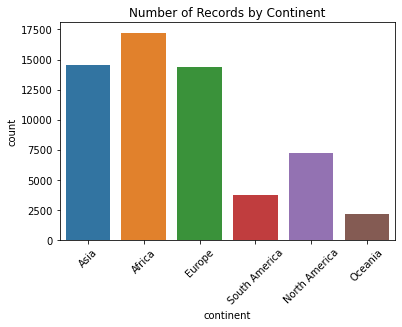

In [ ]:
# Continent
sns.countplot(x=covid3[covid3.columns[0]])
plt.title('Number of Records by Continent')
plt.xticks(rotation=45)
plt.show()

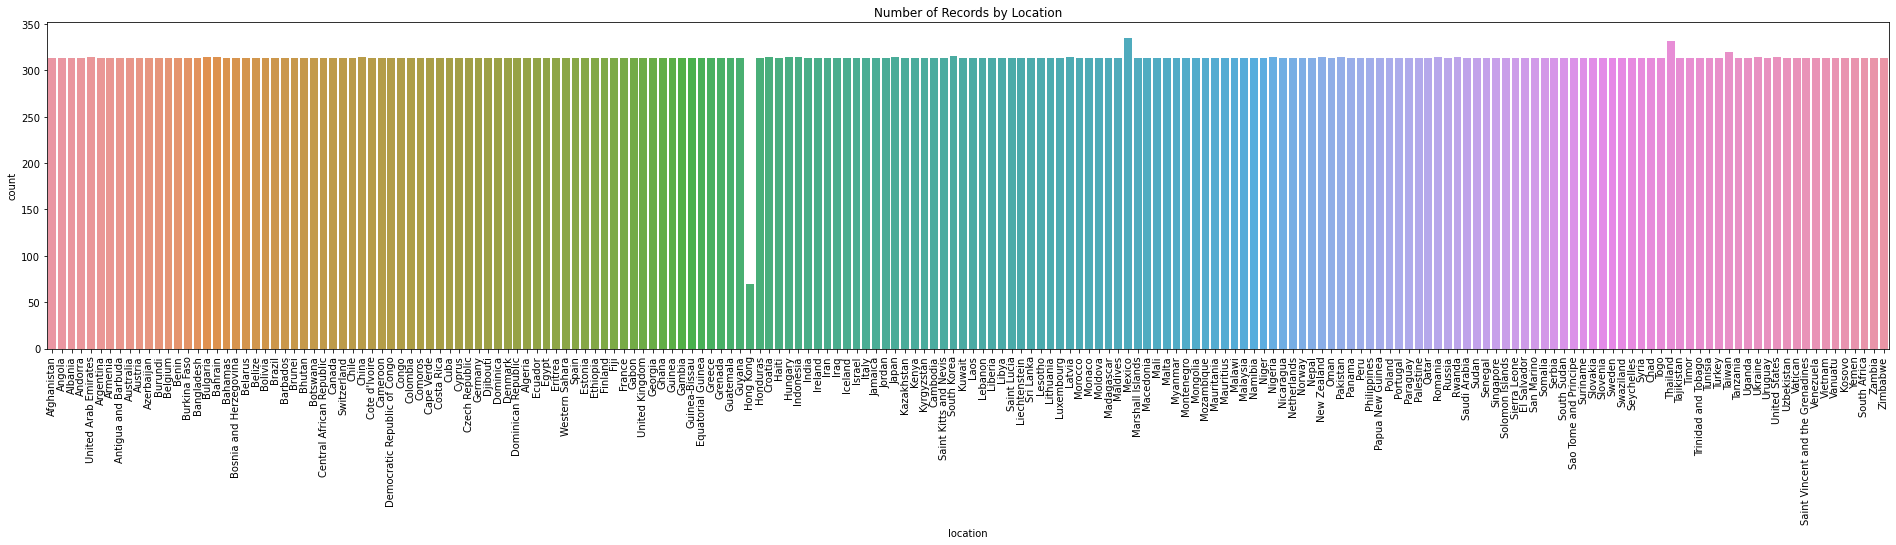

In [ ]:
# Location
plt.figure(figsize=(33,6))
sns.countplot(x=covid3[covid3.columns[1]])
plt.title('Number of Records by Location')
plt.xticks(rotation=90)
plt.show()

Hong Kong had fewer number of records in this dataset.

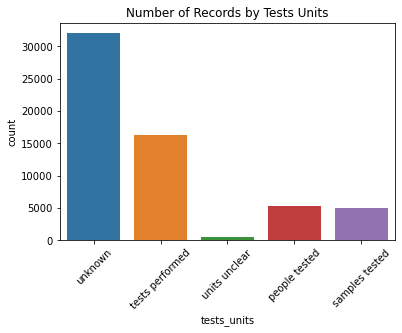

In [ ]:
# Tests Units
sns.countplot(x=covid3[covid3.columns[16]])
plt.title('Number of Records by Tests Units')
plt.xticks(rotation=45)
plt.show()

#### Histograms

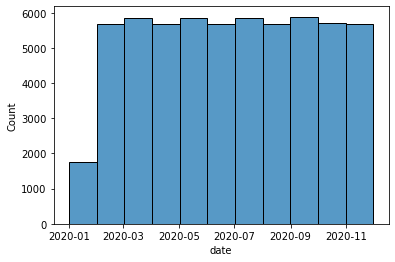

In [ ]:
# Date Attribute
sns.histplot(covid3[covid3.columns[2]], bins=11)
plt.show()

The number of records collected from February and onwards overall looks constant.

##### Numerical Attributes

In [ ]:
# For cleaner results, warnings were ignored
import warnings
warnings.filterwarnings('ignore')

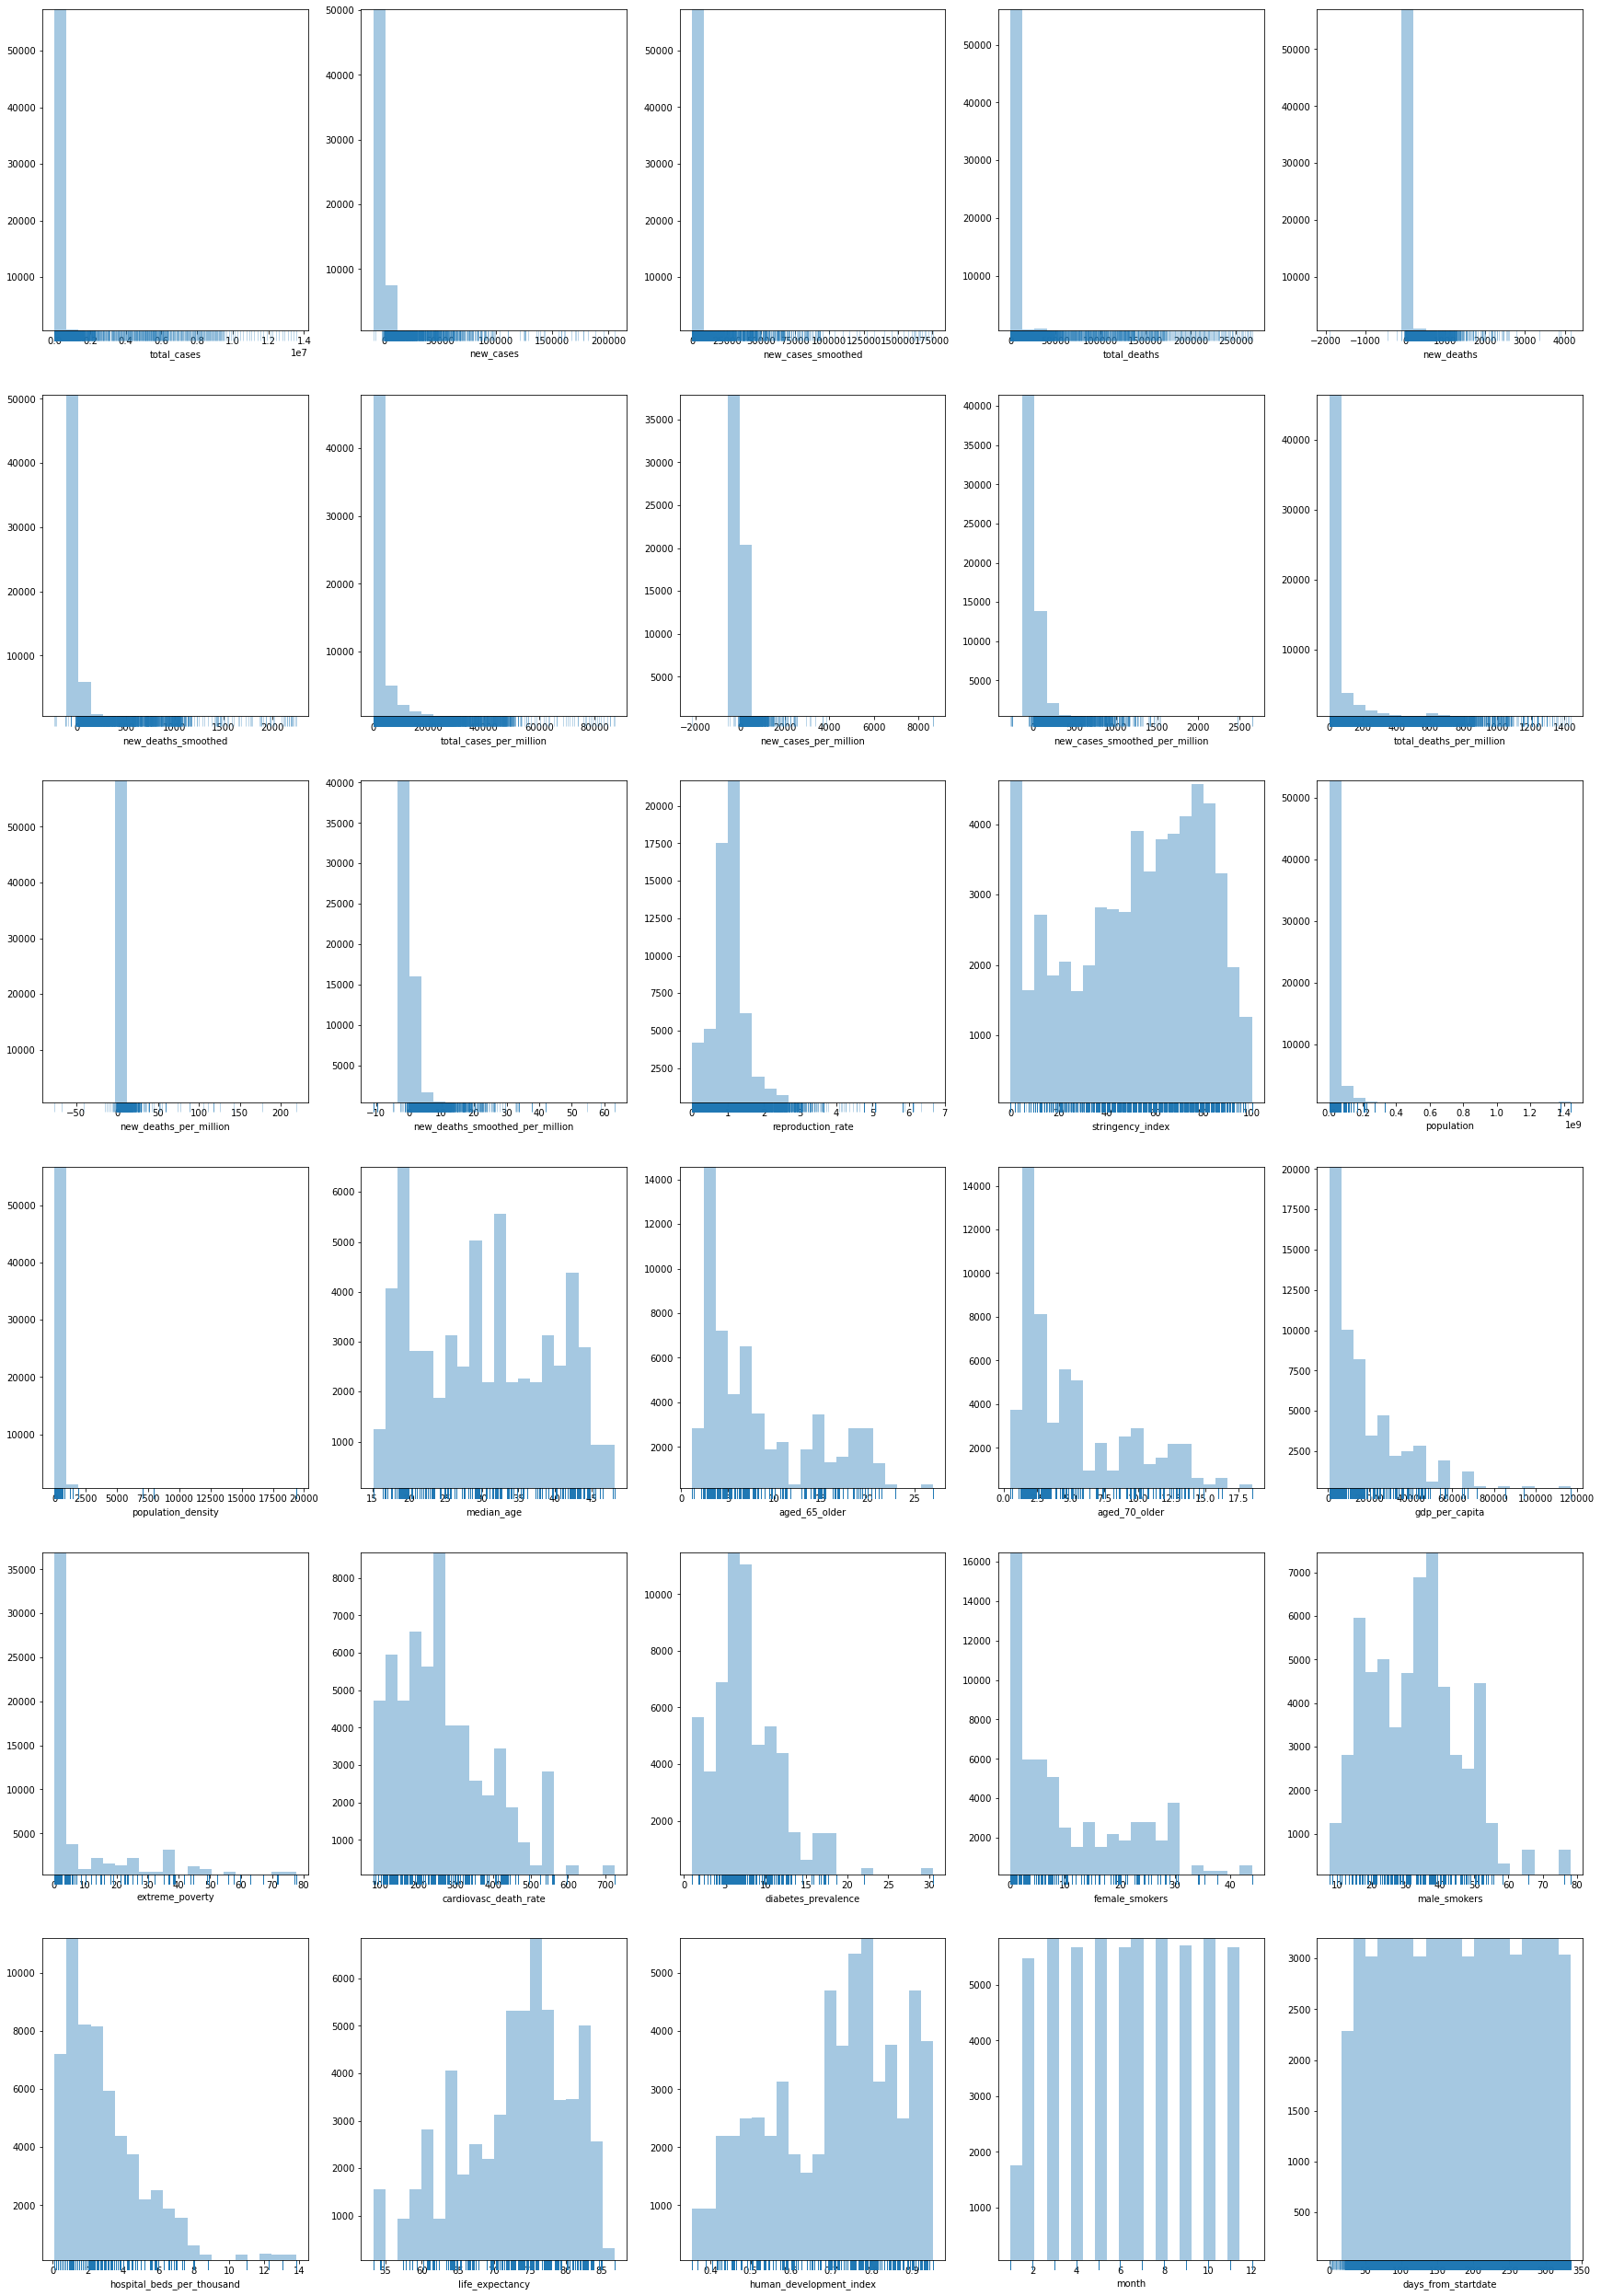

In [ ]:
fig = plt.figure(figsize=(30,45))

ax1 = plt.subplot(6, 5, 1)
sns.distplot(covid3[covid3.columns[3]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax1)

ax2 = plt.subplot(6, 5, 2)
sns.distplot(covid3[covid3.columns[4]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax2)

ax3 = plt.subplot(6, 5, 3)
sns.distplot(covid3[covid3.columns[5]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax3)

ax4 = plt.subplot(6, 5, 4)
sns.distplot(covid3[covid3.columns[6]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax4)

ax5 = plt.subplot(6, 5, 5)
sns.distplot(covid3[covid3.columns[7]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax5)

ax6 = plt.subplot(6, 5, 6)
sns.distplot(covid3[covid3.columns[8]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax6)

ax7 = plt.subplot(6, 5, 7)
sns.distplot(covid3[covid3.columns[9]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax7)

ax8 = plt.subplot(6, 5, 8)
sns.distplot(covid3[covid3.columns[10]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax8)

ax9 = plt.subplot(6, 5, 9)
sns.distplot(covid3[covid3.columns[11]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax9)

ax10 = plt.subplot(6, 5, 10)
sns.distplot(covid3[covid3.columns[12]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax10)

ax11 = plt.subplot(6, 5, 11)
sns.distplot(covid3[covid3.columns[13]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax11)

ax12 = plt.subplot(6, 5, 12)
sns.distplot(covid3[covid3.columns[14]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax12)

ax13 = plt.subplot(6, 5, 13)
sns.distplot(covid3[covid3.columns[15]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax13)

ax14 = plt.subplot(6, 5, 14)
sns.distplot(covid3[covid3.columns[17]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax14)

ax15 = plt.subplot(6, 5, 15)
sns.distplot(covid3[covid3.columns[18]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax15)

ax16 = plt.subplot(6, 5, 16)
sns.distplot(covid3[covid3.columns[19]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax16)

ax17 = plt.subplot(6, 5, 17)
sns.distplot(covid3[covid3.columns[20]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax17)

ax18 = plt.subplot(6, 5, 18)
sns.distplot(covid3[covid3.columns[21]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax18)

ax19 = plt.subplot(6, 5, 19)
sns.distplot(covid3[covid3.columns[22]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax19)

ax20 = plt.subplot(6, 5, 20)
sns.distplot(covid3[covid3.columns[23]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax20)

ax21 = plt.subplot(6, 5, 21)
sns.distplot(covid3[covid3.columns[24]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax21)

ax22 = plt.subplot(6, 5, 22)
sns.distplot(covid3[covid3.columns[25]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax22)

ax23 = plt.subplot(6, 5, 23)
sns.distplot(covid3[covid3.columns[26]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax23)

ax24 = plt.subplot(6, 5, 24)
sns.distplot(covid3[covid3.columns[27]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax24)

ax25 = plt.subplot(6, 5, 25)
sns.distplot(covid3[covid3.columns[28]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax25)

ax26 = plt.subplot(6, 5, 26)
sns.distplot(covid3[covid3.columns[29]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax26)

ax27 = plt.subplot(6, 5, 27)
sns.distplot(covid3[covid3.columns[30]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax27)

ax28 = plt.subplot(6, 5, 28)
sns.distplot(covid3[covid3.columns[31]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax28)

ax29 = plt.subplot(6, 5, 29)
sns.distplot(covid3[covid3.columns[32]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax29)

ax30 = plt.subplot(6, 5, 30)
sns.distplot(covid3[covid3.columns[34]], bins=20, kde=False, rug=True, rug_kws= {"alpha": 0.3, "height":-.03, "clip_on": False},
             ax=ax30)


plt.show()

#### Boxplots

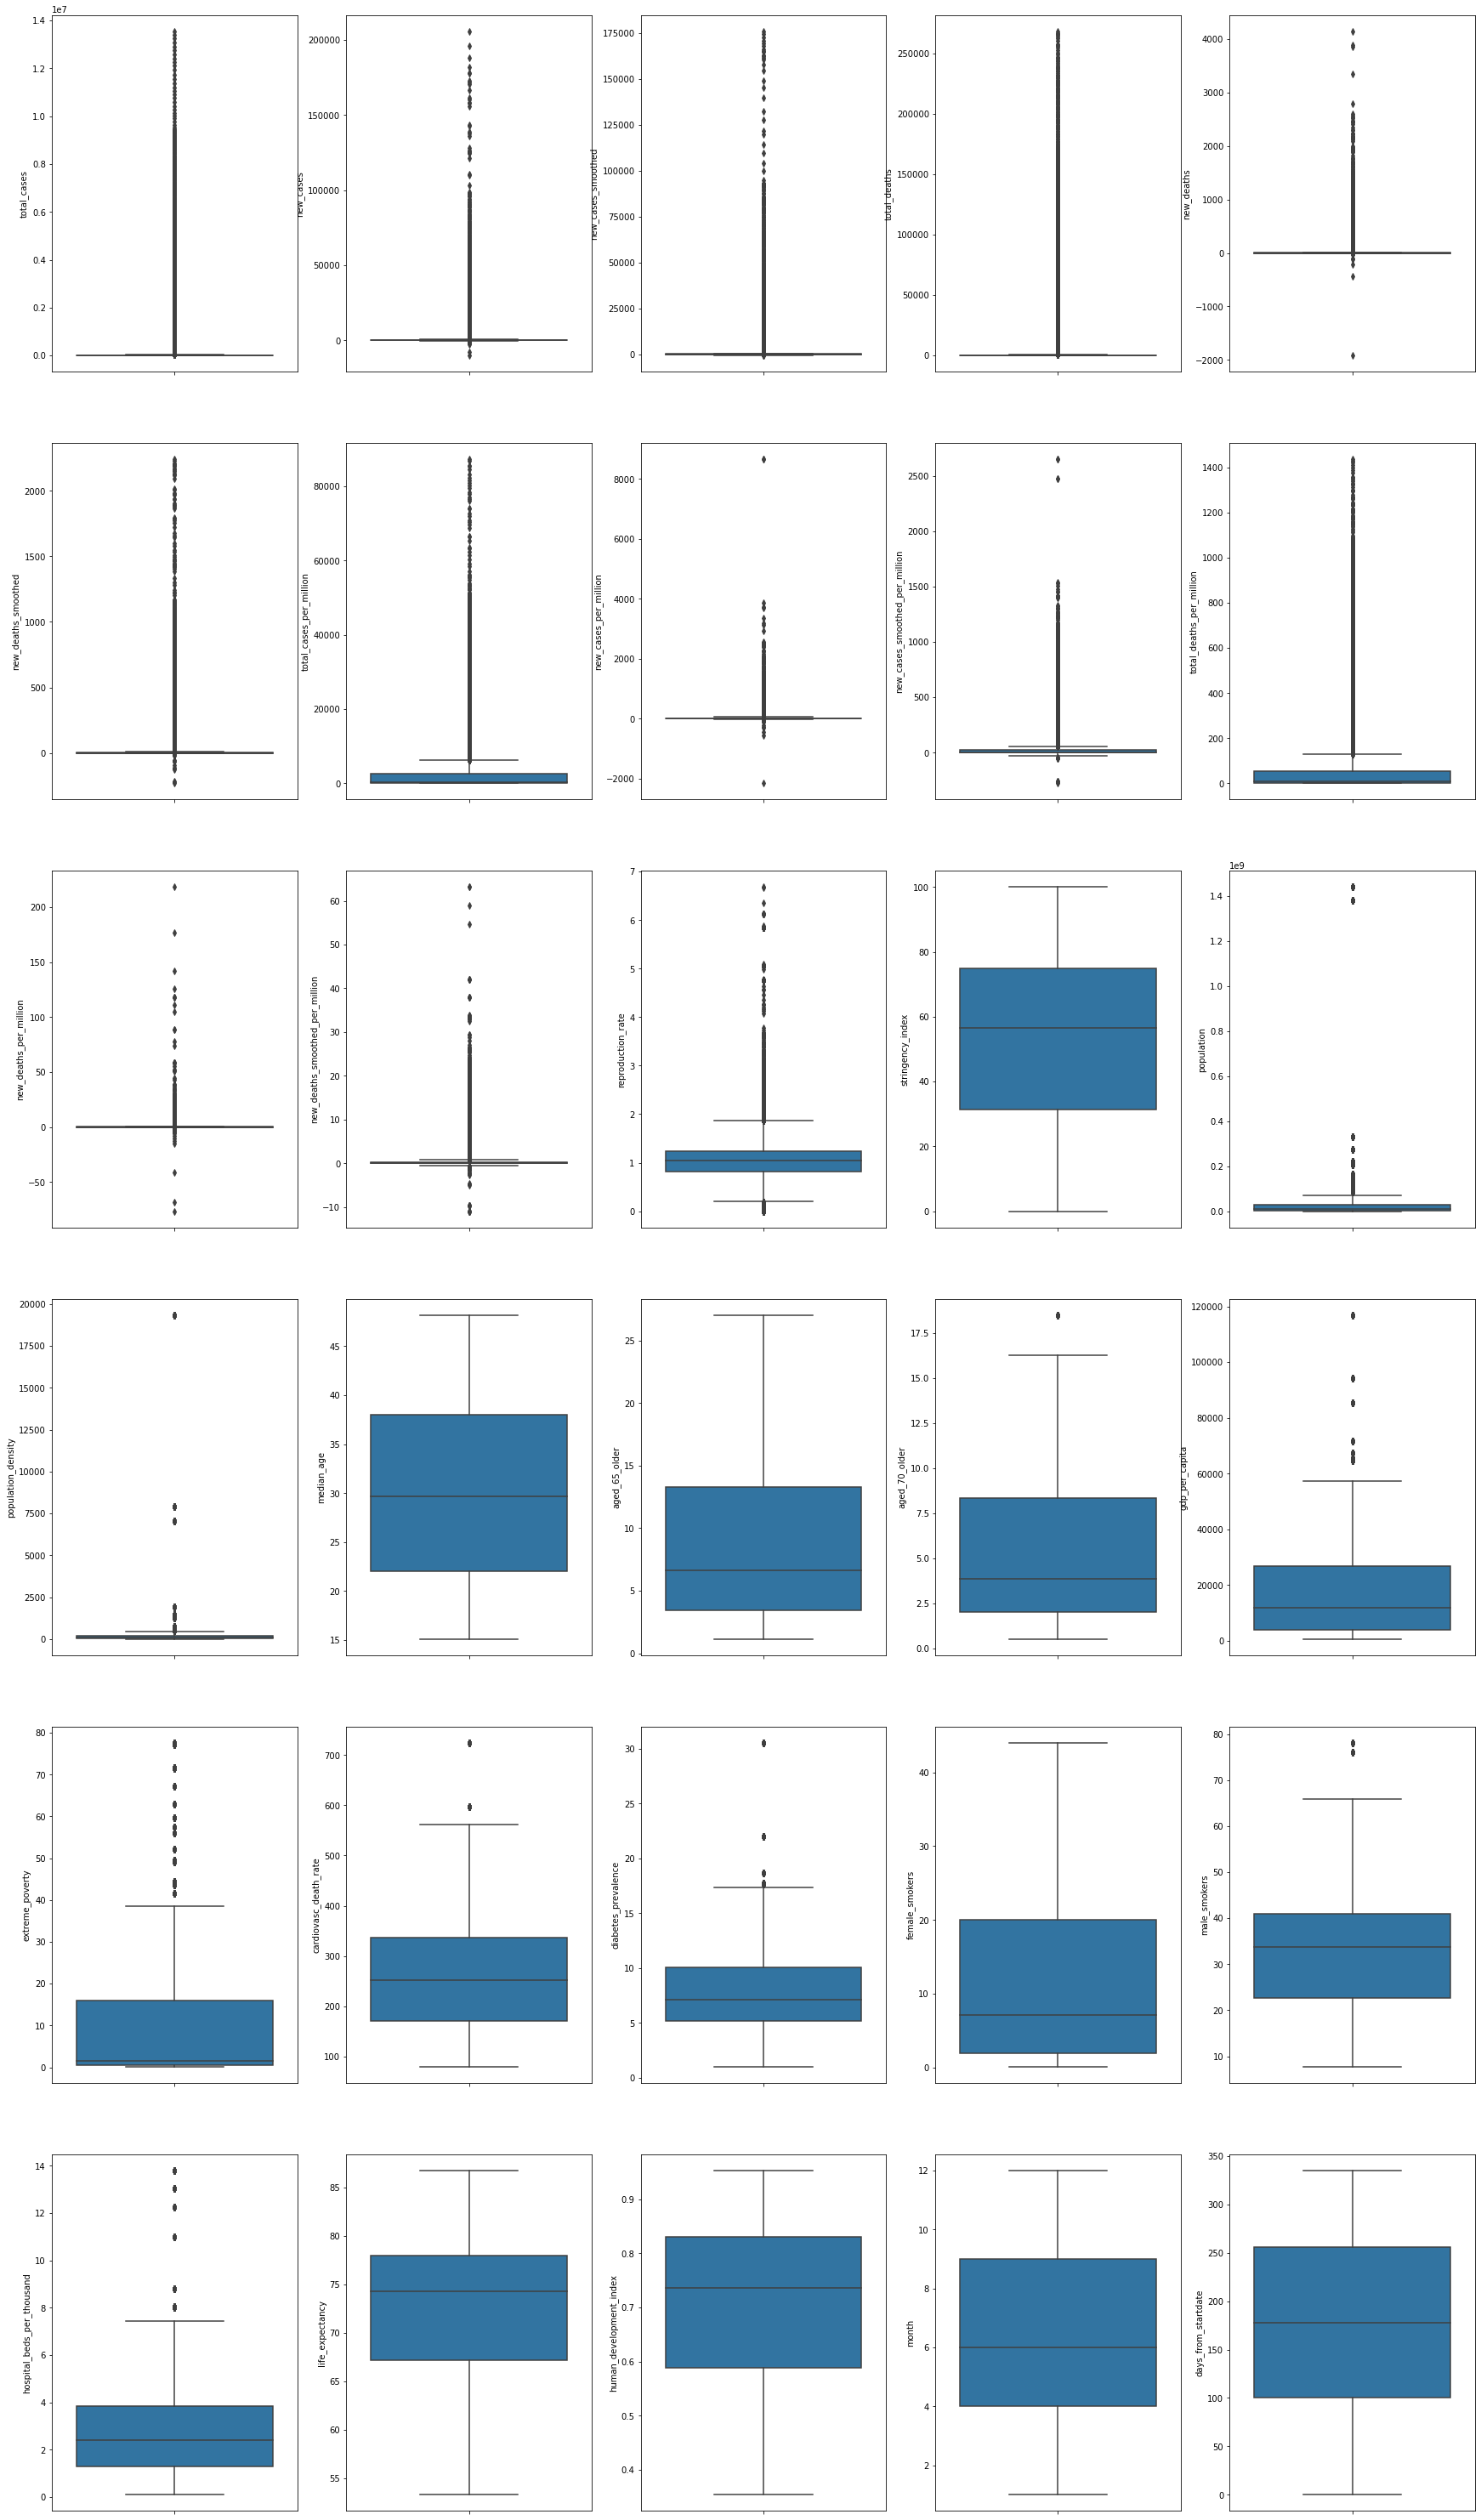

In [ ]:
fig = plt.figure(figsize=(30,54))

ax1 = plt.subplot(6, 5, 1)
sns.boxplot(y=covid3[covid3.columns[3]], ax=ax1)

ax2 = plt.subplot(6, 5, 2)
sns.boxplot(y=covid3[covid3.columns[4]], ax=ax2)

ax3 = plt.subplot(6, 5, 3)
sns.boxplot(y=covid3[covid3.columns[5]], ax=ax3)

ax4 = plt.subplot(6, 5, 4)
sns.boxplot(y=covid3[covid3.columns[6]], ax=ax4)

ax5 = plt.subplot(6, 5, 5)
sns.boxplot(y=covid3[covid3.columns[7]], ax=ax5)

ax6 = plt.subplot(6, 5, 6)
sns.boxplot(y=covid3[covid3.columns[8]], ax=ax6)

ax7 = plt.subplot(6, 5, 7)
sns.boxplot(y=covid3[covid3.columns[9]], ax=ax7)

ax8 = plt.subplot(6, 5, 8)
sns.boxplot(y=covid3[covid3.columns[10]], ax=ax8)

ax9 = plt.subplot(6, 5, 9)
sns.boxplot(y=covid3[covid3.columns[11]], ax=ax9)

ax10 = plt.subplot(6, 5, 10)
sns.boxplot(y=covid3[covid3.columns[12]], ax=ax10)

ax11 = plt.subplot(6, 5, 11)
sns.boxplot(y=covid3[covid3.columns[13]], ax=ax11)

ax12 = plt.subplot(6, 5, 12)
sns.boxplot(y=covid3[covid3.columns[14]], ax=ax12)

ax13 = plt.subplot(6, 5, 13)
sns.boxplot(y=covid3[covid3.columns[15]], ax=ax13)

ax14 = plt.subplot(6, 5, 14)
sns.boxplot(y=covid3[covid3.columns[17]], ax=ax14)

ax15 = plt.subplot(6, 5, 15)
sns.boxplot(y=covid3[covid3.columns[18]], ax=ax15)

ax16 = plt.subplot(6, 5, 16)
sns.boxplot(y=covid3[covid3.columns[19]], ax=ax16)

ax17 = plt.subplot(6, 5, 17)
sns.boxplot(y=covid3[covid3.columns[20]], ax=ax17)

ax18 = plt.subplot(6, 5, 18)
sns.boxplot(y=covid3[covid3.columns[21]], ax=ax18)

ax19 = plt.subplot(6, 5, 19)
sns.boxplot(y=covid3[covid3.columns[22]], ax=ax19)

ax20 = plt.subplot(6, 5, 20)
sns.boxplot(y=covid3[covid3.columns[23]], ax=ax20)

ax21 = plt.subplot(6, 5, 21)
sns.boxplot(y=covid3[covid3.columns[24]], ax=ax21)

ax22 = plt.subplot(6, 5, 22)
sns.boxplot(y=covid3[covid3.columns[25]], ax=ax22)

ax23 = plt.subplot(6, 5, 23)
sns.boxplot(y=covid3[covid3.columns[26]], ax=ax23)

ax24 = plt.subplot(6, 5, 24)
sns.boxplot(y=covid3[covid3.columns[27]], ax=ax24)

ax25 = plt.subplot(6, 5, 25)
sns.boxplot(y=covid3[covid3.columns[28]], ax=ax25)

ax26 = plt.subplot(6, 5, 26)
sns.boxplot(y=covid3[covid3.columns[29]], ax=ax26)

ax27 = plt.subplot(6, 5, 27)
sns.boxplot(y=covid3[covid3.columns[30]], ax=ax27)

ax28 = plt.subplot(6, 5, 28)
sns.boxplot(y=covid3[covid3.columns[31]], ax=ax28)

ax29 = plt.subplot(6, 5, 29)
sns.boxplot(y=covid3[covid3.columns[32]], ax=ax29)

ax30 = plt.subplot(6, 5, 30)
sns.boxplot(y=covid3[covid3.columns[34]], ax=ax30)

plt.show()

#### Violin Plots

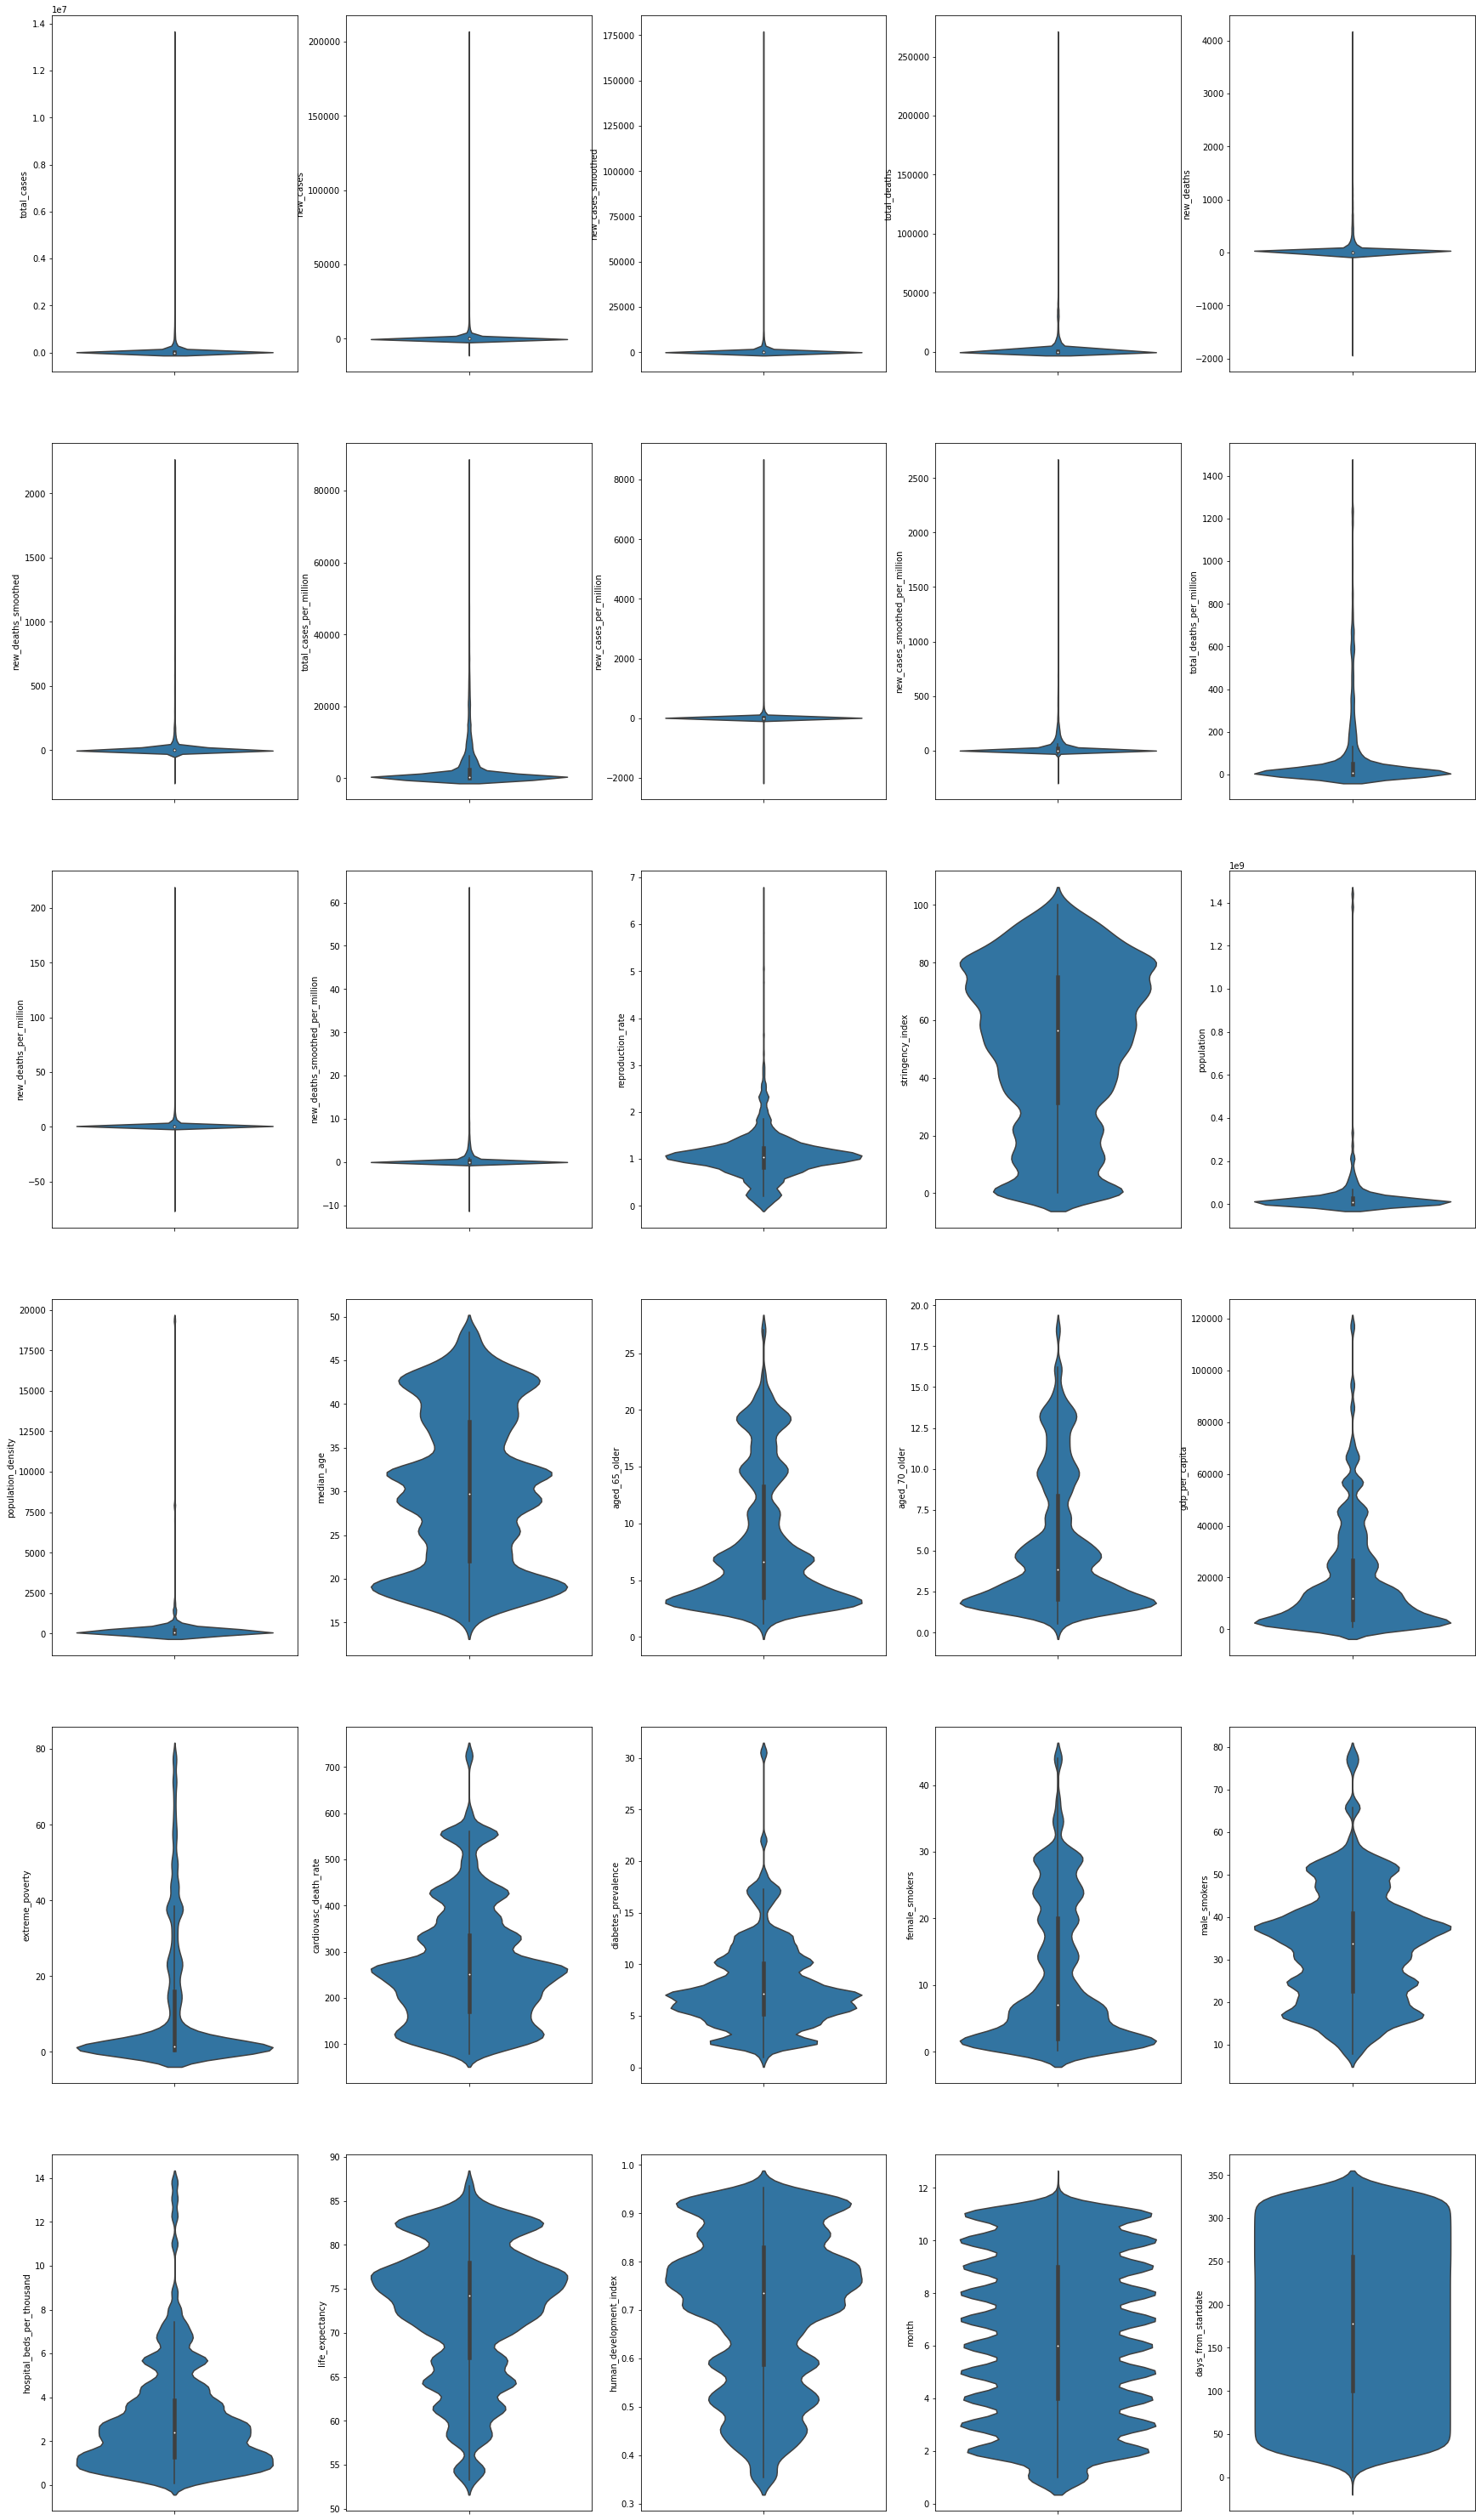

In [ ]:
fig = plt.figure(figsize=(30,54))

ax1 = plt.subplot(6, 5, 1)
sns.violinplot(y=covid3[covid3.columns[3]], ax=ax1)

ax2 = plt.subplot(6, 5, 2)
sns.violinplot(y=covid3[covid3.columns[4]], ax=ax2)

ax3 = plt.subplot(6, 5, 3)
sns.violinplot(y=covid3[covid3.columns[5]], ax=ax3)

ax4 = plt.subplot(6, 5, 4)
sns.violinplot(y=covid3[covid3.columns[6]], ax=ax4)

ax5 = plt.subplot(6, 5, 5)
sns.violinplot(y=covid3[covid3.columns[7]], ax=ax5)

ax6 = plt.subplot(6, 5, 6)
sns.violinplot(y=covid3[covid3.columns[8]], ax=ax6)

ax7 = plt.subplot(6, 5, 7)
sns.violinplot(y=covid3[covid3.columns[9]], ax=ax7)

ax8 = plt.subplot(6, 5, 8)
sns.violinplot(y=covid3[covid3.columns[10]], ax=ax8)

ax9 = plt.subplot(6, 5, 9)
sns.violinplot(y=covid3[covid3.columns[11]], ax=ax9)

ax10 = plt.subplot(6, 5, 10)
sns.violinplot(y=covid3[covid3.columns[12]], ax=ax10)

ax11 = plt.subplot(6, 5, 11)
sns.violinplot(y=covid3[covid3.columns[13]], ax=ax11)

ax12 = plt.subplot(6, 5, 12)
sns.violinplot(y=covid3[covid3.columns[14]], ax=ax12)

ax13 = plt.subplot(6, 5, 13)
sns.violinplot(y=covid3[covid3.columns[15]], ax=ax13)

ax14 = plt.subplot(6, 5, 14)
sns.violinplot(y=covid3[covid3.columns[17]], ax=ax14)

ax15 = plt.subplot(6, 5, 15)
sns.violinplot(y=covid3[covid3.columns[18]], ax=ax15)

ax16 = plt.subplot(6, 5, 16)
sns.violinplot(y=covid3[covid3.columns[19]], ax=ax16)

ax17 = plt.subplot(6, 5, 17)
sns.violinplot(y=covid3[covid3.columns[20]], ax=ax17)

ax18 = plt.subplot(6, 5, 18)
sns.violinplot(y=covid3[covid3.columns[21]], ax=ax18)

ax19 = plt.subplot(6, 5, 19)
sns.violinplot(y=covid3[covid3.columns[22]], ax=ax19)

ax20 = plt.subplot(6, 5, 20)
sns.violinplot(y=covid3[covid3.columns[23]], ax=ax20)

ax21 = plt.subplot(6, 5, 21)
sns.violinplot(y=covid3[covid3.columns[24]], ax=ax21)

ax22 = plt.subplot(6, 5, 22)
sns.violinplot(y=covid3[covid3.columns[25]], ax=ax22)

ax23 = plt.subplot(6, 5, 23)
sns.violinplot(y=covid3[covid3.columns[26]], ax=ax23)

ax24 = plt.subplot(6, 5, 24)
sns.violinplot(y=covid3[covid3.columns[27]], ax=ax24)

ax25 = plt.subplot(6, 5, 25)
sns.violinplot(y=covid3[covid3.columns[28]], ax=ax25)

ax26 = plt.subplot(6, 5, 26)
sns.violinplot(y=covid3[covid3.columns[29]], ax=ax26)

ax27 = plt.subplot(6, 5, 27)
sns.violinplot(y=covid3[covid3.columns[30]], ax=ax27)

ax28 = plt.subplot(6, 5, 28)
sns.violinplot(y=covid3[covid3.columns[31]], ax=ax28)

ax29 = plt.subplot(6, 5, 29)
sns.violinplot(y=covid3[covid3.columns[32]], ax=ax29)

ax30 = plt.subplot(6, 5, 30)
sns.violinplot(y=covid3[covid3.columns[34]], ax=ax30)

plt.show()

### <a id='b2_ID'> Bivariate Analysis </a>

#### Barplots for Categorical Attributes

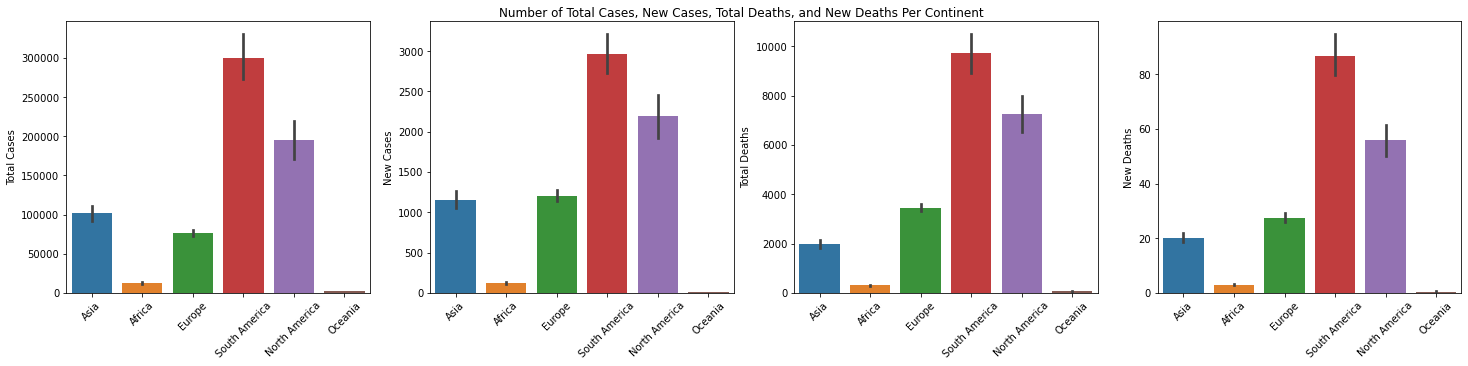

In [ ]:
fig = plt.figure(figsize=(25,5))
fig.suptitle('Number of Total Cases, New Cases, Total Deaths, and New Deaths Per Continent', y=0.92)

ax1 = plt.subplot(1, 4, 1)
sns.barplot(x="continent", y="total_cases", data=covid3, ax=ax1)
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
ax1.xaxis.label.set_visible(False)

ax2 = plt.subplot(1, 4, 2)
sns.barplot(x="continent", y="new_cases", data=covid3, ax=ax2)
plt.ylabel("New Cases")
plt.xticks(rotation=45)
ax2.xaxis.label.set_visible(False)

ax3 = plt.subplot(1, 4, 3)
sns.barplot(x="continent", y="total_deaths", data=covid3, ax=ax3)
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
ax3.xaxis.label.set_visible(False)

ax4 = plt.subplot(1, 4, 4)
sns.barplot(x="continent", y="new_deaths", data=covid3, ax=ax4)
plt.ylabel("New Deaths")
plt.xticks(rotation=45)
ax4.xaxis.label.set_visible(False)

The bar plots show that total cases, new cases, total deaths and new deaths were highest in South America, followed by North America, Europe, Asia, Africa, and Oceania.

#### Line plots

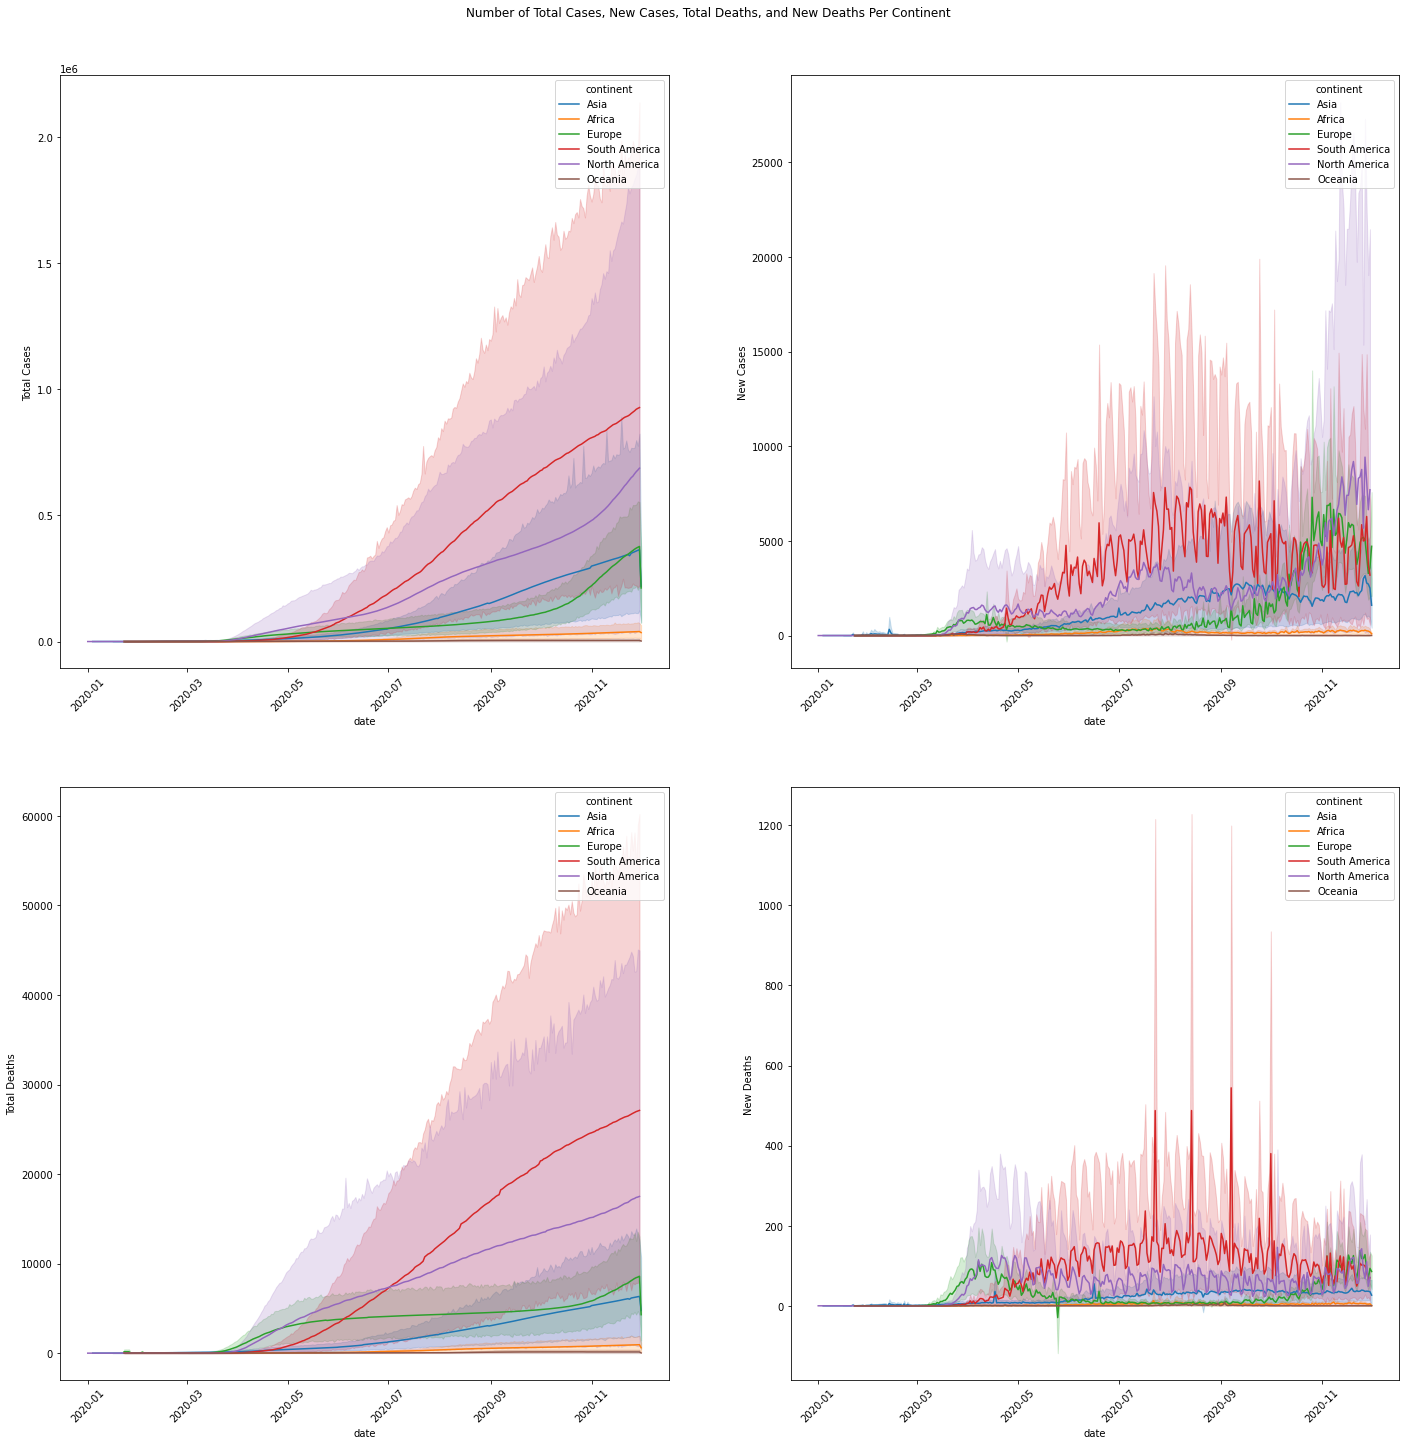

In [ ]:
fig = plt.figure(figsize=(24,24))
fig.suptitle('Number of Total Cases, New Cases, Total Deaths, and New Deaths Per Continent', y=0.90)

ax1 = plt.subplot(2, 2, 1)
sns.lineplot(x="date", y="total_cases", data=covid3, hue="continent", ax=ax1)
plt.ylabel("Total Cases")

ax2 = plt.subplot(2, 2, 2)
sns.lineplot(x="date", y="new_cases", data=covid3, hue="continent", ax=ax2)
plt.ylabel("New Cases")

ax3 = plt.subplot(2, 2, 3)
sns.lineplot(x="date", y="total_deaths", data=covid3, hue="continent", ax=ax3)
plt.ylabel("Total Deaths")

ax4 = plt.subplot(2, 2, 4)
sns.lineplot(x="date", y="new_deaths", data=covid3, hue="continent", ax=ax4)
plt.ylabel("New Deaths")

plt.show()

The number of total cases and total deaths were higher for South America and North America in this dataset, followed by Europe and Asia, Africa, and lastly Oceania near November 2020. For number of new cases and new deaths, there was an increase for Europe and North America near April 2020, then South and North Americas after May 2020 to October 2020, and again near the end of November 2020, there were increases for Europe, South America, North America, and Asia.  Asia shows a more steadily increase over 2020 over Africa and Oceania in theis dataset and increased more after July 2020. 

#### Box Plots

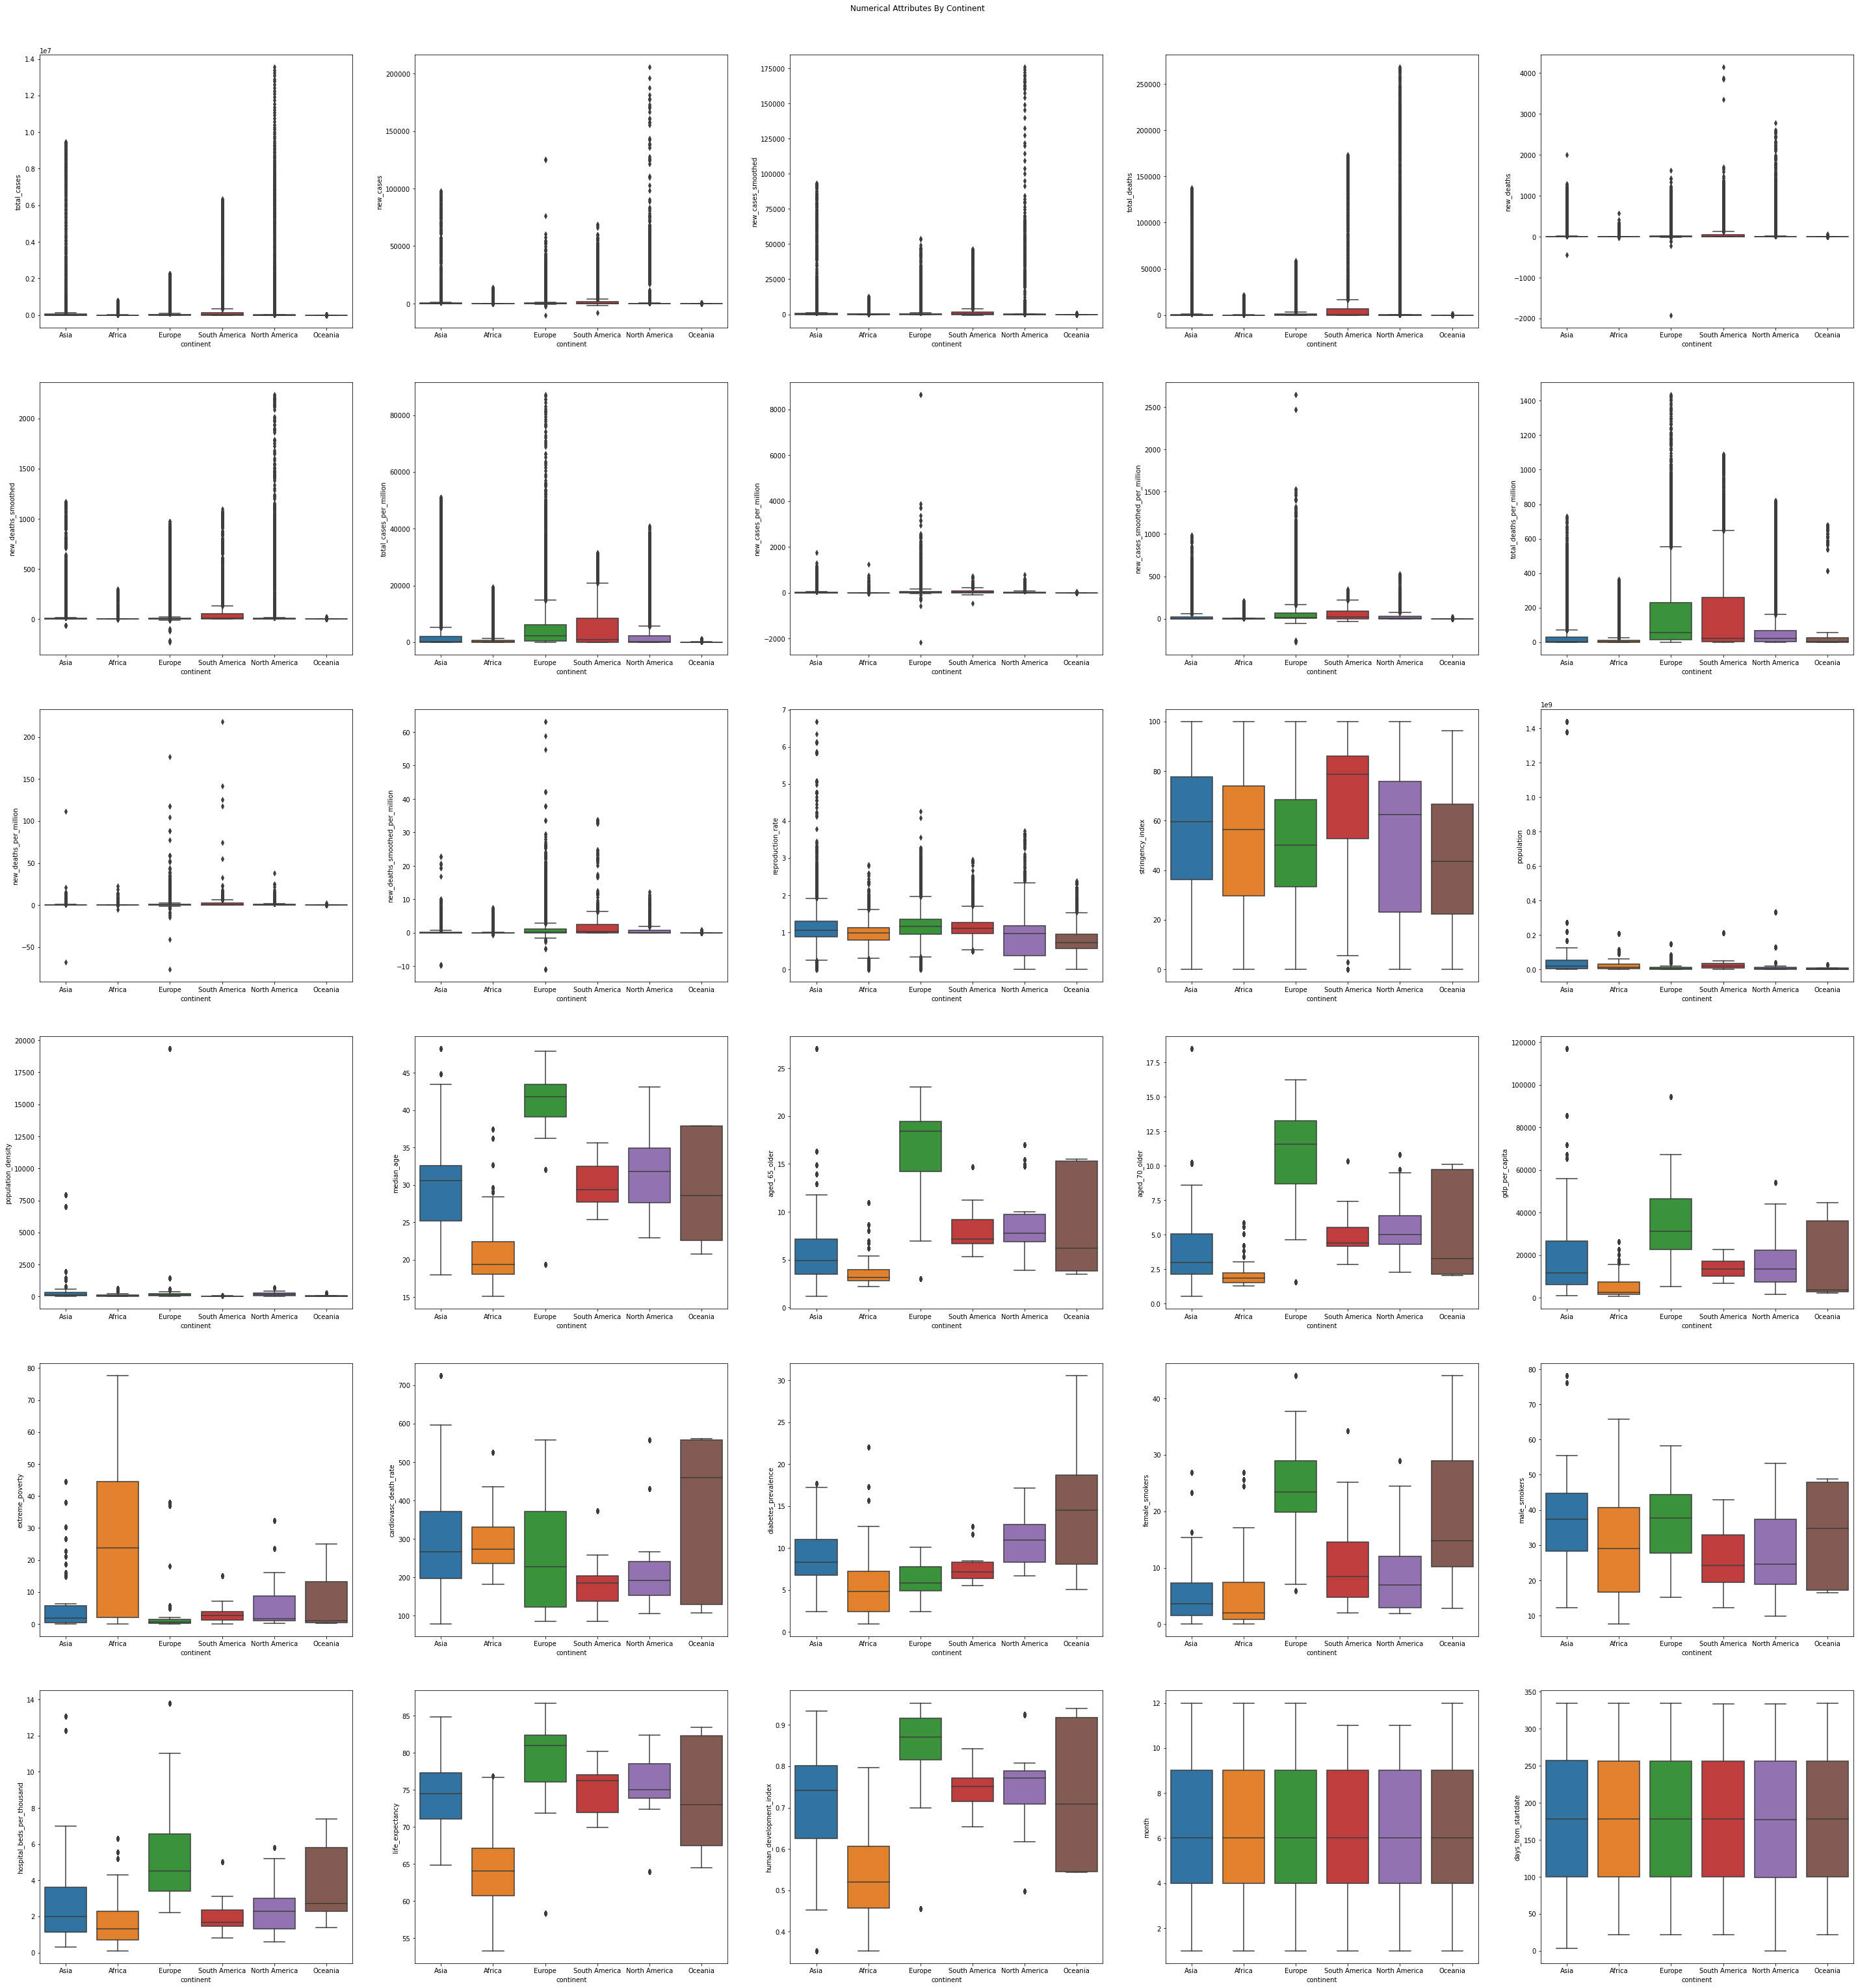

In [ ]:
fig = plt.figure(figsize=(50,54))
fig.suptitle('Numerical Attributes By Continent', y=0.90)

ax1 = plt.subplot(6, 5, 1)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[3]], ax=ax1)

ax2 = plt.subplot(6, 5, 2)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[4]], ax=ax2)

ax3 = plt.subplot(6, 5, 3)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[5]], ax=ax3)

ax4 = plt.subplot(6, 5, 4)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[6]], ax=ax4)

ax5 = plt.subplot(6, 5, 5)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[7]], ax=ax5)

ax6 = plt.subplot(6, 5, 6)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[8]], ax=ax6)

ax7 = plt.subplot(6, 5, 7)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[9]], ax=ax7)

ax8 = plt.subplot(6, 5, 8)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[10]], ax=ax8)

ax9 = plt.subplot(6, 5, 9)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[11]], ax=ax9)

ax10 = plt.subplot(6, 5, 10)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[12]], ax=ax10)

ax11 = plt.subplot(6, 5, 11)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[13]], ax=ax11)

ax12 = plt.subplot(6, 5, 12)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[14]], ax=ax12)

ax13 = plt.subplot(6, 5, 13)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[15]], ax=ax13)

ax14 = plt.subplot(6, 5, 14)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[17]], ax=ax14)

ax15 = plt.subplot(6, 5, 15)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[18]], ax=ax15)

ax16 = plt.subplot(6, 5, 16)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[19]], ax=ax16)

ax17 = plt.subplot(6, 5, 17)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[20]], ax=ax17)

ax18 = plt.subplot(6, 5, 18)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[21]], ax=ax18)

ax19 = plt.subplot(6, 5, 19)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[22]], ax=ax19)

ax20 = plt.subplot(6, 5, 20)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[23]], ax=ax20)

ax21 = plt.subplot(6, 5, 21)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[24]], ax=ax21)

ax22 = plt.subplot(6, 5, 22)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[25]], ax=ax22)

ax23 = plt.subplot(6, 5, 23)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[26]], ax=ax23)

ax24 = plt.subplot(6, 5, 24)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[27]], ax=ax24)

ax25 = plt.subplot(6, 5, 25)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[28]], ax=ax25)

ax26 = plt.subplot(6, 5, 26)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[29]], ax=ax26)

ax27 = plt.subplot(6, 5, 27)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[30]], ax=ax27)

ax28 = plt.subplot(6, 5, 28)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[31]], ax=ax28)

ax29 = plt.subplot(6, 5, 29)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[32]], ax=ax29)

ax30 = plt.subplot(6, 5, 30)
sns.boxplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[34]], ax=ax30)

plt.show()

#### Violin Plots

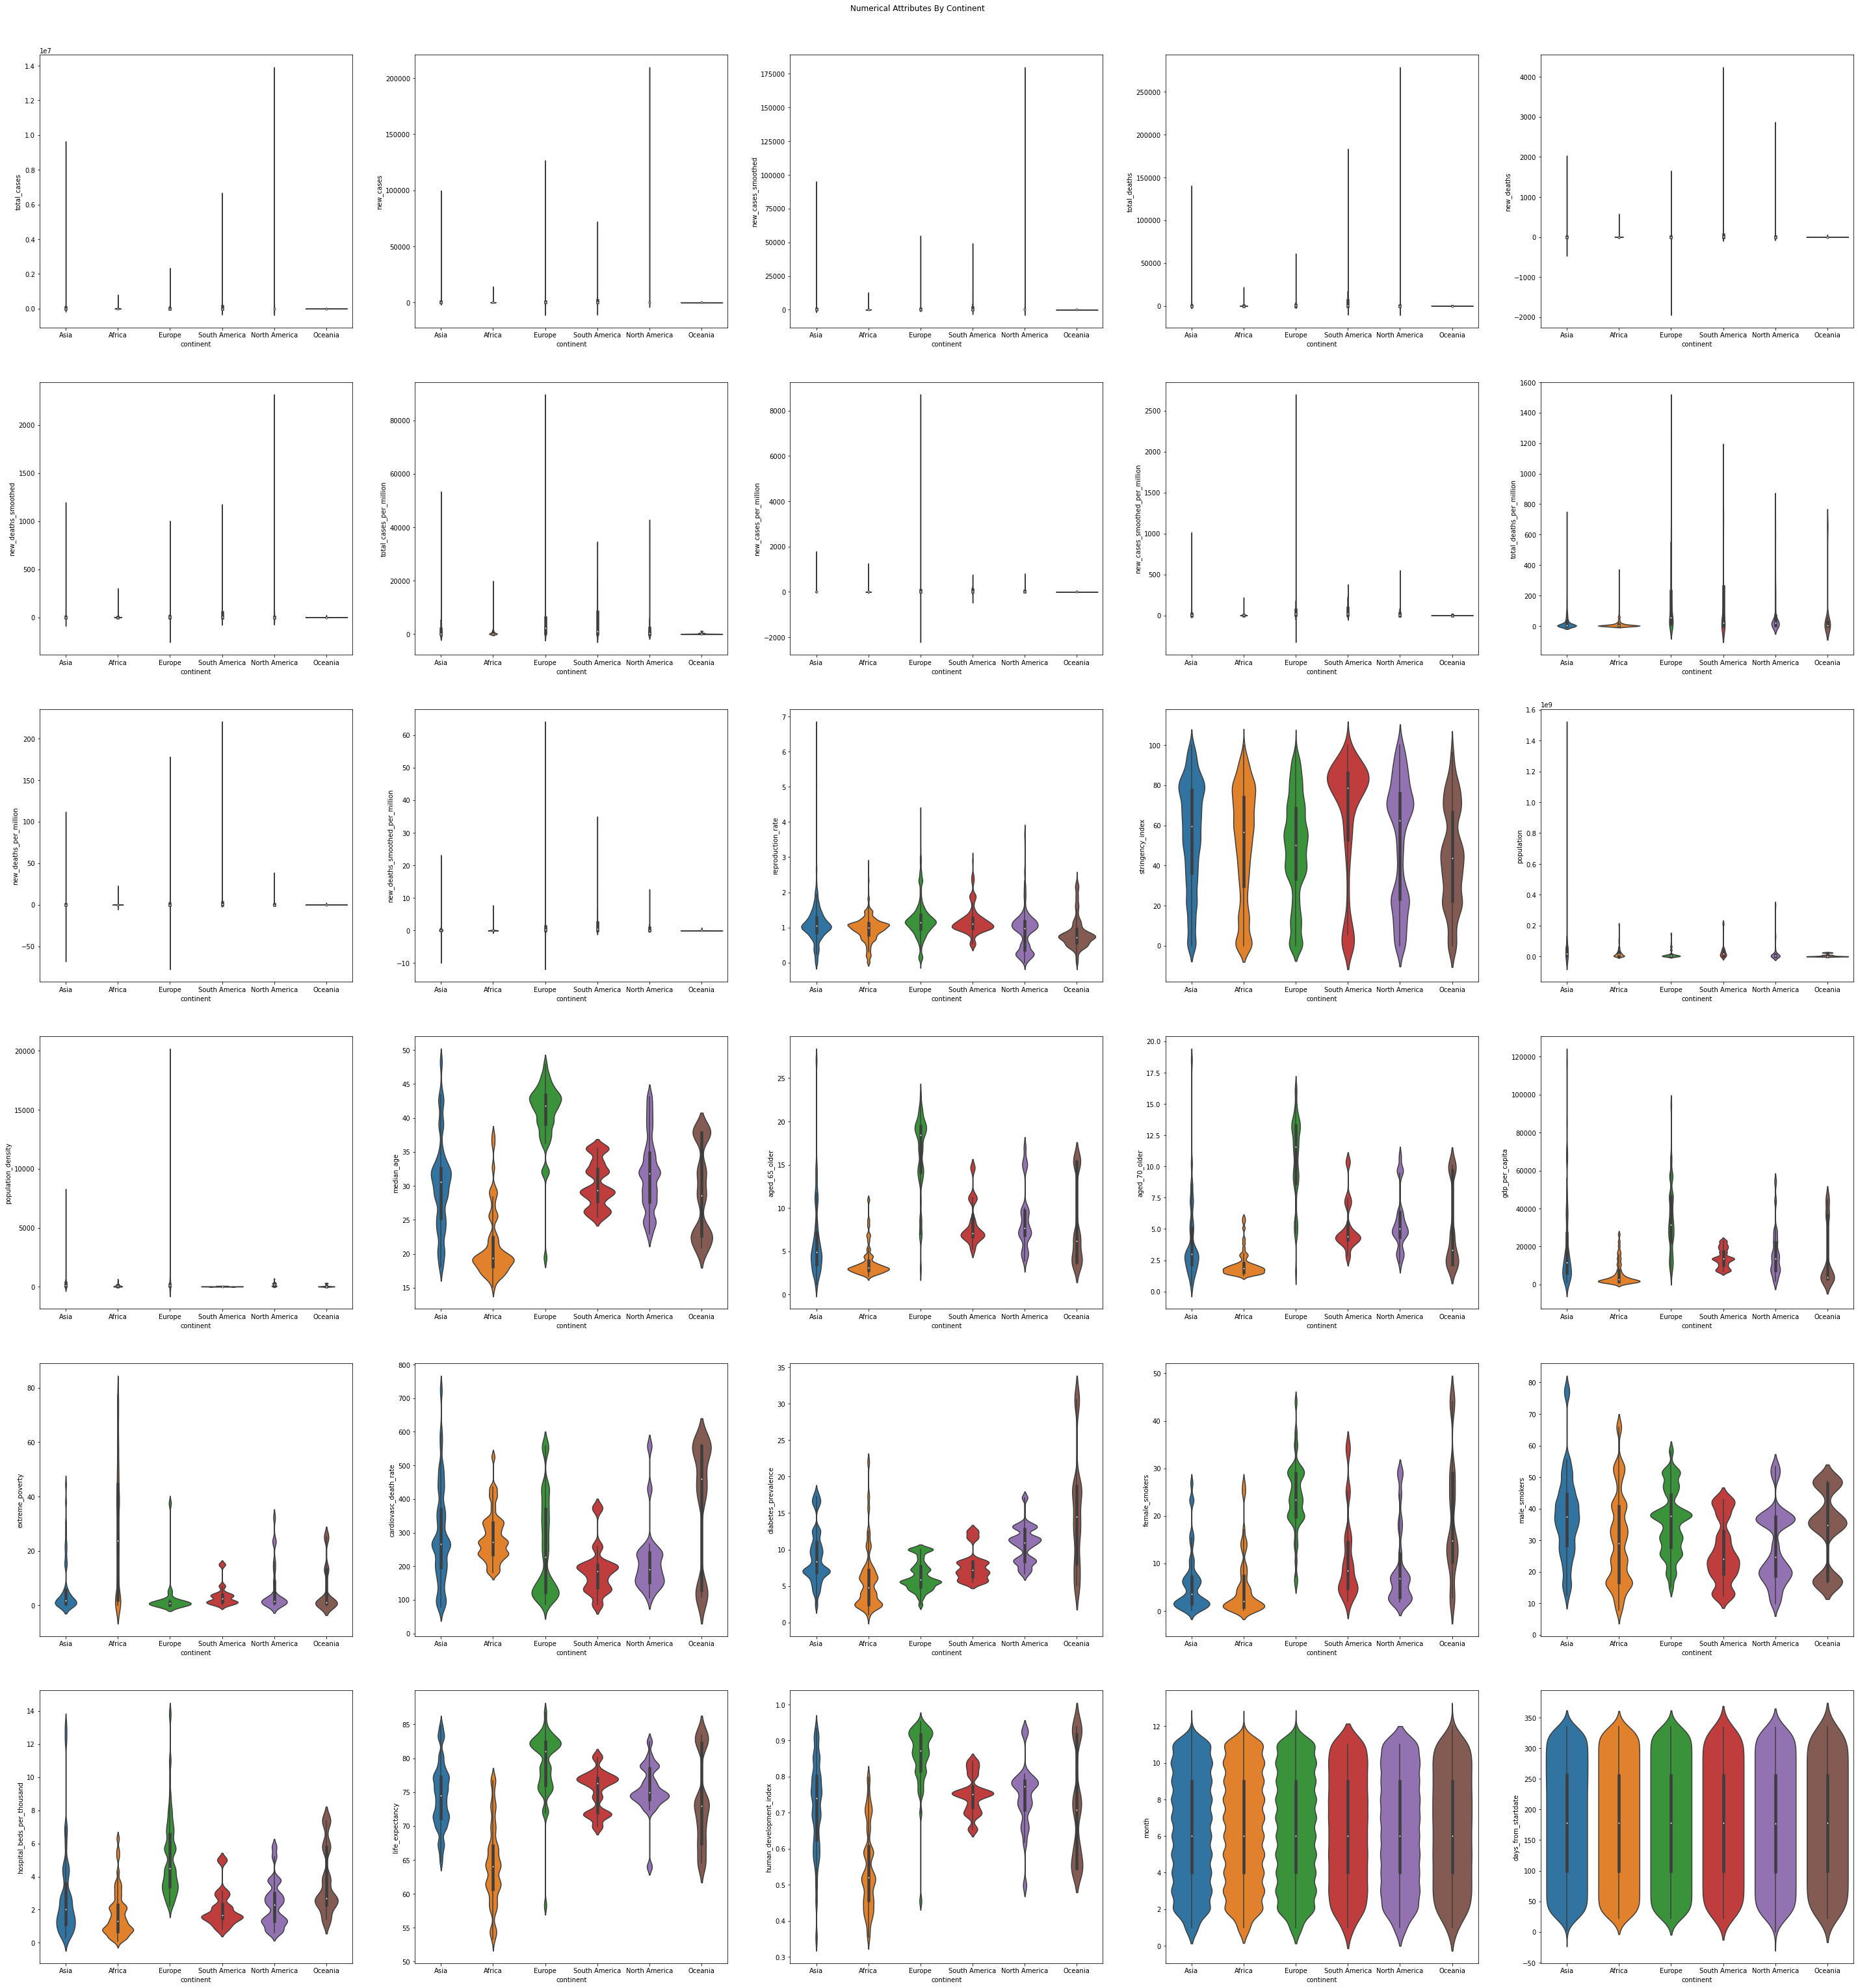

In [ ]:
fig = plt.figure(figsize=(50,54))
fig.suptitle('Numerical Attributes By Continent', y=0.90)

ax1 = plt.subplot(6, 5, 1)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[3]], ax=ax1)

ax2 = plt.subplot(6, 5, 2)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[4]], ax=ax2)

ax3 = plt.subplot(6, 5, 3)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[5]], ax=ax3)

ax4 = plt.subplot(6, 5, 4)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[6]], ax=ax4)

ax5 = plt.subplot(6, 5, 5)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[7]], ax=ax5)

ax6 = plt.subplot(6, 5, 6)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[8]], ax=ax6)

ax7 = plt.subplot(6, 5, 7)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[9]], ax=ax7)

ax8 = plt.subplot(6, 5, 8)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[10]], ax=ax8)

ax9 = plt.subplot(6, 5, 9)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[11]], ax=ax9)

ax10 = plt.subplot(6, 5, 10)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[12]], ax=ax10)

ax11 = plt.subplot(6, 5, 11)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[13]], ax=ax11)

ax12 = plt.subplot(6, 5, 12)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[14]], ax=ax12)

ax13 = plt.subplot(6, 5, 13)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[15]], ax=ax13)

ax14 = plt.subplot(6, 5, 14)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[17]], ax=ax14)

ax15 = plt.subplot(6, 5, 15)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[18]], ax=ax15)

ax16 = plt.subplot(6, 5, 16)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[19]], ax=ax16)

ax17 = plt.subplot(6, 5, 17)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[20]], ax=ax17)

ax18 = plt.subplot(6, 5, 18)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[21]], ax=ax18)

ax19 = plt.subplot(6, 5, 19)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[22]], ax=ax19)

ax20 = plt.subplot(6, 5, 20)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[23]], ax=ax20)

ax21 = plt.subplot(6, 5, 21)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[24]], ax=ax21)

ax22 = plt.subplot(6, 5, 22)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[25]], ax=ax22)

ax23 = plt.subplot(6, 5, 23)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[26]], ax=ax23)

ax24 = plt.subplot(6, 5, 24)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[27]], ax=ax24)

ax25 = plt.subplot(6, 5, 25)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[28]], ax=ax25)

ax26 = plt.subplot(6, 5, 26)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[29]], ax=ax26)

ax27 = plt.subplot(6, 5, 27)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[30]], ax=ax27)

ax28 = plt.subplot(6, 5, 28)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[31]], ax=ax28)

ax29 = plt.subplot(6, 5, 29)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[32]], ax=ax29)

ax30 = plt.subplot(6, 5, 30)
sns.violinplot(x=covid3[covid3.columns[0]], y=covid3[covid3.columns[34]], ax=ax30)

plt.show()

#### Pair Plots and Scatterplots

In [1]:
# Vizualize relationship between independent and dependent variables
##sns.pairplot(covid3, height=5)

### <a id='b3_ID'> Correlation Analysis </a>

Since the histograms showed nonparametric distributions for the attributes in the dataset, Spearman correlation was chosen over Pearson correlation.

#### Spearman Correlation

In [ ]:
# Correlation for the attributes in the Covid dataset
corr_spearman = covid3.corr(method='spearman')
corr_spearman

total_cases  new_cases  new_cases_smoothed  \
total_cases                         1.000000   0.845969            0.921373   
new_cases                           0.845969   1.000000            0.924386   
new_cases_smoothed                  0.921373   0.924386            1.000000   
total_deaths                        0.918254   0.775541            0.836582   
new_deaths                          0.735904   0.820610            0.799763   
new_deaths_smoothed                 0.837287   0.848920            0.897877   
total_cases_per_million             0.832359   0.663483            0.737086   
new_cases_per_million               0.759257   0.925395            0.841606   
new_cases_smoothed_per_million      0.802716   0.802176            0.887018   
total_deaths_per_million            0.687843   0.534954            0.585144   
new_deaths_per_million              0.700432   0.787660            0.766738   
new_deaths_smoothed_per_million     0.778197   0.788684            0.842039   
reproduction_rate                   0.078334   0.270913            0.231186   
stringency_index                    0.412011   0.443001            0.488379   
population                          0.398378   0.414594            0.423066   
population_density                  0.035828   0.048852            0.030471   
median_age                          0.229552   0.255521            0.231915   
aged_65_older                       0.205421   0.235358            0.215303   
aged_70_older                       0.204044   0.229402            0.212122   
gdp_per_capita                      0.242326   0.250639            0.234631   
extreme_poverty                    -0.138657  -0.145408           -0.130504   
cardiovasc_death_rate              -0.211066  -0.181486           -0.193219   
diabetes_prevalence                -0.016191   0.007344           -0.007734   
female_smokers                      0.047872   0.069956            0.051327   
male_smokers                       -0.064960  -0.061786           -0.068949   
hospital_beds_per_thousand          0.052981   0.060319            0.045346   
life_expectancy                     0.239378   0.257677            0.237111   
human_development_index             0.246887   0.265863            0.244657   
month                               0.660723   0.426652            0.502799   
day                                 0.019562   0.016454            0.017847   
days_from_startdate                 0.663834   0.429592            0.506084   

                                 total_deaths  new_deaths  \
total_cases                          0.918254    0.735904   
new_cases                            0.775541    0.820610   
new_cases_smoothed                   0.836582    0.799763   
total_deaths                         1.000000    0.738702   
new_deaths                           0.738702    1.000000   
new_deaths_smoothed                  0.828926    0.874970   
total_cases_per_million              0.754748    0.556382   
new_cases_per_million                0.670447    0.703715   
new_cases_smoothed_per_million       0.698500    0.656197   
total_deaths_per_million             0.764575    0.531023   
new_deaths_per_million               0.696756    0.968226   
new_deaths_smoothed_per_million      0.757650    0.796780   
reproduction_rate                    0.081025    0.172928   
stringency_index                     0.330885    0.374830   
population                           0.407860    0.418422   
population_density                   0.019068    0.022676   
median_age                           0.252316    0.224182   
aged_65_older                        0.263964    0.239690   
aged_70_older                        0.260926    0.228075   
gdp_per_capita                       0.229629    0.209703   
extreme_poverty                     -0.126748   -0.117979   
cardiovasc_death_rate               -0.186489   -0.130831   
diabetes_prevalence                 -0.017138    0.041014   
female_smokers                       0.1

#### Heatmap

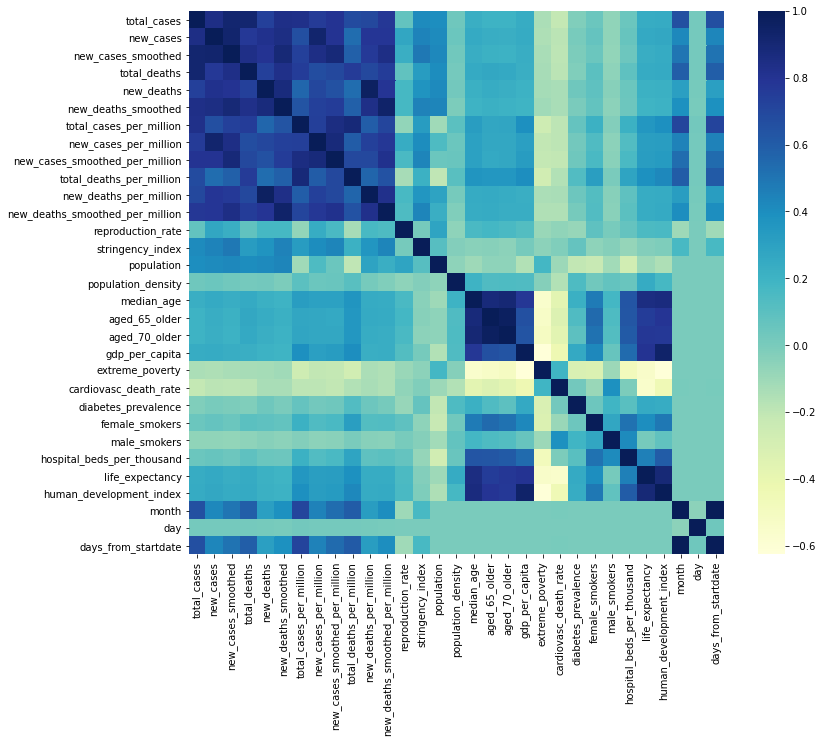

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_spearman, cmap="YlGnBu")
plt.show()

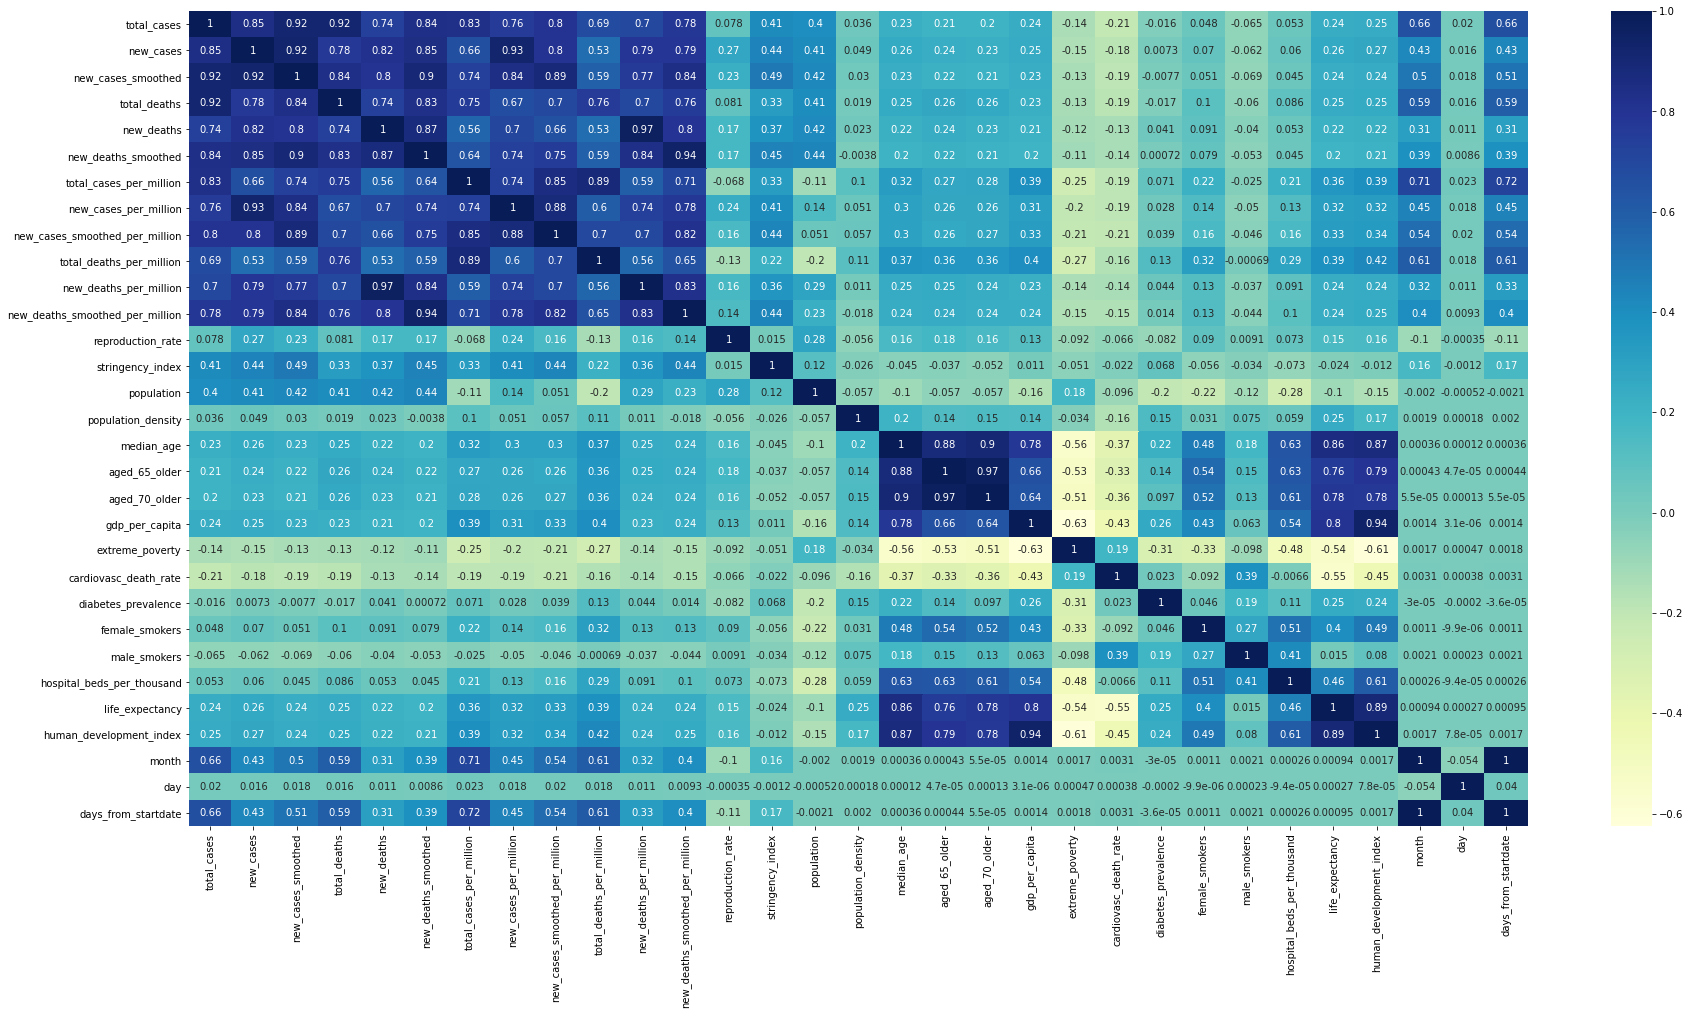

In [ ]:
plt.figure(figsize = (30,15))
sns.heatmap(corr_spearman, cmap="YlGnBu", annot=True)
plt.show()

Looking at the above correlation heatmaps:

**Postive Correlation**
* Stronger to moderate correlation among the first 12 numeric attributes, including the original, smoothed, and per million with respect to 'total_cases', 'new_cases', 'total_deaths' and 'new_deaths'
* 'hospital_patients_per_thousand', 'life_expectancy' and 'human_development_index' strong to moderately correlated with each other and 'median_age', 'aged_65_older', 'aged_70_older', and gdp_per_capita' showed strong to moderate correlation 

**Negative Correlation**
* 'extrame_poverty' showed moderately correlation with 'median_age', 'aged_65_older', 'aged_70_older', gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', and 'human_development_index

#### Clustermap

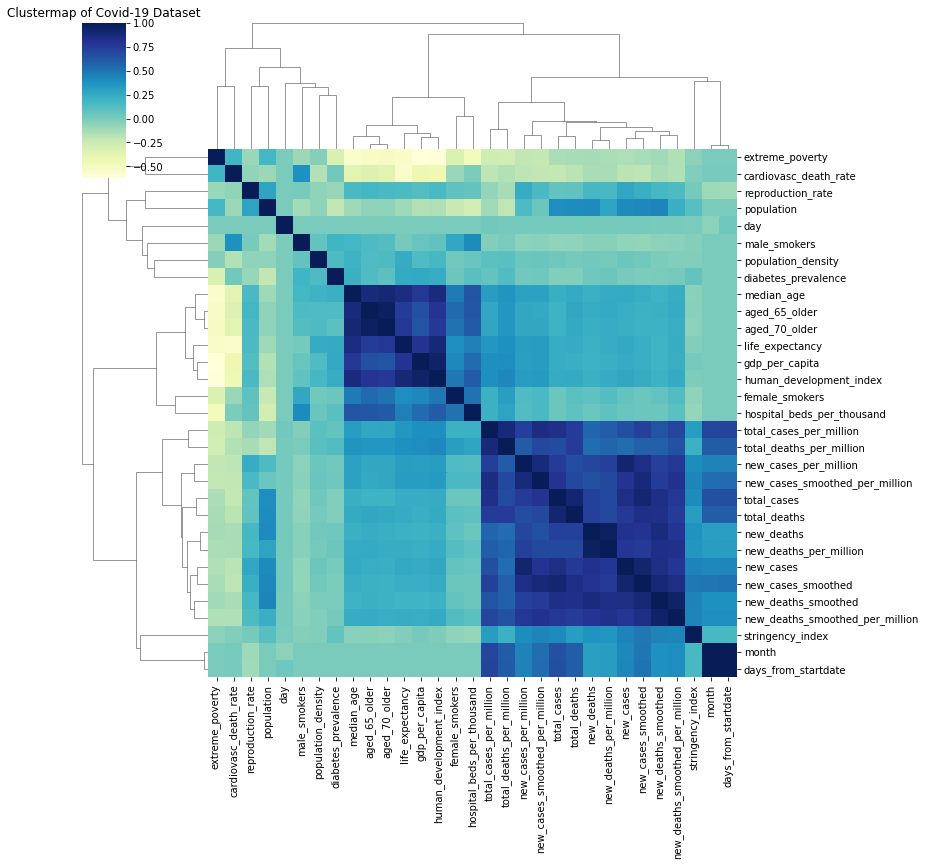

In [ ]:
sns.clustermap(corr_spearman, cmap='YlGnBu', figsize = (12,12))
plt.title('Clustermap of Covid-19 Dataset')
plt.show()

The clustermap illustrated the attributes could be divided into different number of categories.  For example, the attributes could be divided into 4 categories:                       
1) 'extreme_poverty' and 'cardiovasc_death_rates', 2) 'reproduction_rate' to 'diabetes prevalance', 3) 'median_agen' to 'hopsital_beds_per_thousand', and 4) 'total_tests_per_million' to 'days_from_startdate'.

### <a id='b4_ID'> Factorizing Categorical Attributes </a>

In [ ]:
# Make a copy of data frame
covid3_fct = covid3.copy()

In [ ]:
# Factorize 'continent', 'location', and 'tests_units' variables
covid3_fct['continent'] = pd.Categorical(covid3_fct['continent'], ordered=False).codes +1
covid3_fct['location'] = pd.Categorical(covid3_fct['location'], ordered=False).codes +1
covid3_fct['tests_units'] = pd.Categorical(covid3_fct['tests_units'], ordered=False).codes +1

In [ ]:
# Remove 'date' column
covid3_fct = covid3_fct.drop('date', axis=1) 

In [ ]:
covid3_fct.columns
##covid3_fct['location'].unique()

Index(['continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'month', 'day', 'days_from_startdate'],
      dtype='object')

## <a id='c_ID'> Exploratory Analysis </a>

### <a id='c1_ID'> Hierarchical Clustering </a>

Hierarchical clustering illustrates the nested clusters organized in a hierarchical tree, where merges and splits are shown and the height of bars indicates how close the data are.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
mergings = linkage(numeric_data, method='complete')

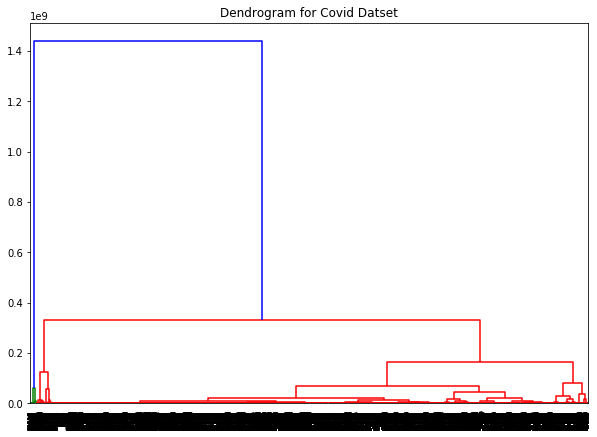

In [ ]:
plt.figure(figsize=(10,7))
dendrogram(mergings, ##labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title("Dendrogram for Covid Datset")
plt.show()

Without normalizing the data, it appears there could be 2, 3, 5, 6 or more clusters in the dendrograms.

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
normalized_numeric_data = normalize(numeric_data)

In [ ]:
mergings_norm = linkage(normalized_numeric_data, method='complete')

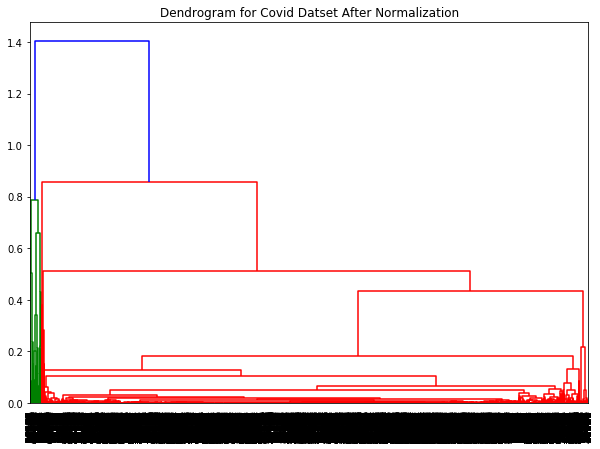

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(mergings_norm, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Covid Datset After Normalization")
plt.show()

Normalizing the dataset, there could be 2, 3, 4, 5, 6 or more clusters in the dendrograms.

### <a id='c2_ID'> K-Means Clustering </a>

K-Means clustering would help divide the data points into groups where more similiar points are grouped together and data points from different clusters are disimiliar.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeansModel5 = KMeans(n_clusters=5, random_state=1)
kmeansModel5.fit(covid3_fct)

KMeans(n_clusters=5, random_state=1)

In [ ]:
kmeansModel5.cluster_centers_

array([[2.09446944e+00, 9.52561524e+01, 1.77014593e+05, 1.94388304e+03,
        1.86341010e+03, 6.91118153e+03, 6.61426303e+01, 6.46460955e+01,
        1.56346276e+03, 1.75224578e+01, 1.67222862e+01, 6.24382974e+01,
        5.94378142e-01, 5.80215666e-01, 1.28618859e+00, 2.96057158e+00,
        5.51879457e+01, 1.11102536e+08, 2.47191174e+02, 3.12514157e+01,
        9.31416274e+00, 6.13822863e+00, 1.67534364e+04, 1.27952898e+01,
        2.66128214e+02, 8.96644615e+00, 9.07946547e+00, 3.65604393e+01,
        3.64755491e+00, 7.38805451e+01, 7.20447208e-01, 6.32521831e+00,
        1.60071447e+01, 1.76983329e+02],
       [2.00000000e+00, 5.64673046e+01, 1.27879471e+06, 1.52399506e+04,
        1.50632004e+04, 2.22820011e+04, 2.27041999e+02, 2.24879970e+02,
        9.25443884e+02, 1.10390011e+01, 1.09107241e+01, 1.60859490e+01,
        1.64309410e-01, 1.62698565e-01, 1.18958533e+00, 3.73524721e+00,
        6.94587879e+01, 1.40971138e+09, 2.98805077e+02, 3.34583732e+01,
        8.31870973e+00,

In [ ]:
kmeansModel5.labels_

array([4, 4, 4, ..., 2, 2, 2])

In [ ]:
kmeansModel10 = KMeans(n_clusters=10, random_state=1)
kmeansModel10.fit(covid3_fct)

KMeans(n_clusters=10, random_state=1)

In [ ]:
kmeansModel10.cluster_centers_

array([[2.72051691e+00, 9.21379713e+01, 8.41550374e+03, 1.12227521e+02,
        1.08064553e+02, 1.35418233e+02, 1.59214020e+00, 1.51830362e+00,
        3.46960521e+03, 4.45375721e+01, 4.30662724e+01, 8.01643158e+01,
        6.07446734e-01, 5.81941323e-01, 9.23679353e-01, 4.19500797e+00,
        5.00381778e+01, 2.72370768e+06, 5.02916782e+02, 3.11972951e+01,
        8.59152505e+00, 5.36462701e+00, 2.19316190e+04, 7.47693397e+00,
        2.77691886e+02, 8.75373447e+00, 1.30284900e+01, 3.42018056e+01,
        3.22148423e+00, 7.34646206e+01, 7.31665888e-01, 6.36526819e+00,
        1.60330678e+01, 1.78228465e+02],
       [2.00000000e+00, 3.60000000e+01, 8.13041911e+04, 2.95031847e+02,
        3.07164713e+02, 4.03790764e+03, 1.50774947e+01, 1.53344618e+01,
        5.64877866e+01, 2.04998938e-01, 2.13378981e-01, 2.80547134e+00,
        1.04872611e-02, 1.06178344e-02, 1.04471338e+00, 4.98726115e+00,
        7.14987580e+01, 1.43932377e+09, 1.47674000e+02, 3.87000000e+01,
        1.06410000e+01,

In [ ]:
kmeansModel10.labels_

array([3, 3, 3, ..., 6, 6, 6])

### Visualizing K-Means Clustering

In [ ]:
covid3_fct.columns[3]

'new_cases'

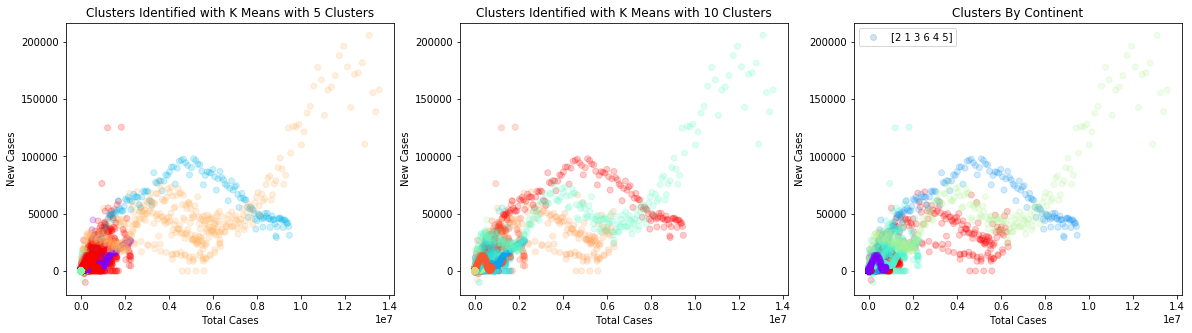

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(covid3_fct.loc[:,'total_cases'], covid3_fct.loc[:,'new_cases'], c=kmeansModel5.labels_, 
            cmap='rainbow', alpha=0.2)
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.title('Clusters Identified with K Means with 5 Clusters')

plt.subplot(1, 3, 2)
plt.scatter(covid3_fct.loc[:,'total_cases'], covid3_fct.loc[:,'new_cases'], c=kmeansModel10.labels_, 
            cmap='rainbow', alpha=0.2)
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.title('Clusters Identified with K Means with 10 Clusters')

plt.subplot(1, 3, 3)
plt.scatter(covid3_fct.loc[:,'total_cases'], covid3_fct.loc[:,'new_cases'], c=covid3_fct.loc[:,'continent'], 
            label=covid3_fct.loc[:,'continent'].unique(), cmap='rainbow', alpha=0.2)
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.title('Clusters By Continent')

plt.show()

## <a id='d_ID'> Splitting Data into Training and Test Sets </a>

The data was prepared for training and evaluating the regression models using the data frame with the factorized categorical variables.  All the independent variables were separated ('X') from the target  (dependent) variable, 'new_cases' ('y').  Then, the 'X' and 'y' sets were then split into training and test sets in order to use the training set for dimensionality reduction and building regression models and test set to evaluate the regression models.

When predicting the number of 'new cases' for a given country (indicated by the 'location' attribute) and date, the related attributes, 'new_cases_smoothed', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_cases', and 'total_cases_per_million', would be unknown and therefore, should be removed as well.

In [ ]:
# Separate the independent variables and the dependent variable
covid3_fct_X = covid3_fct.drop('new_cases', axis=1)
covid3_fct_X = covid3_fct_X.drop('new_cases_smoothed', axis=1)
covid3_fct_X = covid3_fct_X.drop('new_cases_per_million', axis=1)
covid3_fct_X = covid3_fct_X.drop('new_cases_smoothed_per_million', axis=1)
covid3_fct_X = covid3_fct_X.drop('total_cases', axis=1)
covid3_fct_X = covid3_fct_X.drop('total_cases_per_million', axis=1)

X = covid3_fct_X
y = covid3_fct['new_cases'].values

In [ ]:
print(len(X))
print(len(y))

59294
59294


In [ ]:
X[0:5]

continent  location  total_deaths  new_deaths  new_deaths_smoothed  \
0          2         1      1.333333         0.0                  0.0   
1          2         1      1.333333         0.0                  0.0   
2          2         1      1.333333         0.0                  0.0   
3          2         1      1.333333         0.0                  0.0   
4          2         1      1.333333         0.0                  0.0   

   total_deaths_per_million  new_deaths_per_million  \
0                  0.034333                     0.0   
1                  0.034333                     0.0   
2                  0.034333                     0.0   
3                  0.034333                     0.0   
4                  0.034333                     0.0   

   new_deaths_smoothed_per_million  reproduction_rate  tests_units  ...  \
0                              0.0               1.43            5  ...   
1                              0.0               1.43            5  ...   
2                              0.0               1.43            5  ...   
3                              0.0               1.43            5  ...   
4                              0.0               1.43            5  ...   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59            23.3          33.1   
1                597.029                 9.59            23.3          33.1   
2                597.029                 9.59            23.3          33.1   
3                597.029                 9.59            23.3          33.1   
4                597.029                 9.59            23.3          33.1   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.498   
1                         0.5            64.83                    0.498   
2                         0.5            64.83                    0.498   
3                         0.5            64.83                    0.498   
4                         0.5            64.83                    0.498   

   month   day  days_from_startdate  
0    1.0  23.0                 22.0  
1    1.0  24.0                 23.0  
2    1.0  25.0                 24.0  
3    1.0  26.0                 25.0  
4    1.0  27.0                 26.0  

[5 rows x 28 columns]

In [ ]:
y[0:5]

array([0., 0., 0., 0., 0.])

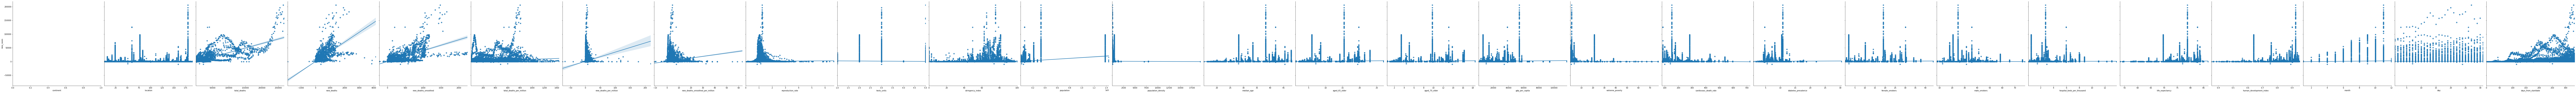

In [ ]:
# Visualize the relationship between the features and the response
sns.pairplot(covid3_fct, x_vars=list(covid3_fct_X.columns), y_vars='new_cases', height=7, kind='reg')
plt.show()

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41505, 28)
(41505,)
(17789, 28)
(17789,)


There are 28 independent variables and a target 'new_cases' variable, 41,505 records in the training set and 17,789 records in the test set.

### <a id='d1_ID'> Feature Scaling </a>

Feature scaling was applied for the independent and dependent variables to reduce the impact of large-valued features on the regression models in the prediction of 'new_cases' attributes by scaling the features to have the same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## Scaling independent variables
sc_X = StandardScaler()

In [ ]:
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [ ]:
## Scaling the dependent 'target' variable
sc_y = StandardScaler()
y_train_sc = sc_y.fit_transform(y_train.reshape(-1, 1))

In [ ]:
print(X_train_sc[0:5])
print(y_train_sc[0:5])

[[ 1.71033348  1.59388778 -0.19724879 -0.19552281 -0.21073093 -0.39955273
  -0.22988377 -0.3217713  -1.1418502   0.84381104 -0.75994431 -0.271466
  -0.18807936 -0.80293638 -0.67354088 -0.66758181 -0.79723499  0.09232109
   2.18504855  0.98299764 -0.79628795  0.11626588  1.17464417 -0.30263748
  -0.65831755  1.55781643  0.22246183  1.58561446]
 [ 0.31014627  1.26601137 -0.05996567 -0.17212165 -0.18002471  0.80284291
  -0.11314878 -0.12016345  0.17014882 -0.59403673 -0.31497683 -0.21609548
  -0.06522652  1.43248576  1.65703674  1.76608937  1.95198315 -0.60635993
  -1.32748061 -0.53220815  1.04662634 -0.30869186  0.64564589  1.44319357
   1.49266096  0.8858721   0.22246183  0.91315613]
 [ 1.01023988 -1.46629207 -0.1969128  -0.19552281 -0.21073093 -0.30832676
  -0.22988377 -0.3217713  -0.74427474  0.84381104 -0.39756279 -0.2715972
   0.22348061  1.06364111  1.07879059  0.99621992 -0.0880281   0.09232109
  -0.77443313  1.34824942 -0.88005678 -1.40144034  1.17464417  0.84113764
   0.58432986

In [ ]:
print(X_test_sc[0:5])

[[-0.38994733  0.15487463 -0.18864759 -0.19552281 -0.20827168 -0.41498135
  -0.22988377 -0.31737791  0.86590588 -2.0318845   0.12999066 -0.05881288
  -0.1408879  -0.04289285 -0.35836022 -0.47651046  0.40795176 -0.62836563
  -0.05950101  2.09524823 -0.96382561  0.71575983 -0.44983874  0.44370202
   0.59694557  0.8858721   0.44819504  0.93520394]
 [-0.38994733 -0.59195497 -0.19167145 -0.1409201  -0.16773706 -0.32432337
   0.36051944  0.28988641  0.42857287  0.84381104  0.32755623 -0.24704235
  -0.16090926  0.94069289  1.06418506  1.18340672 -0.4529703  -0.40280719
   1.79111696 -0.17402575 -0.56359675  1.7098574  -0.15826489  0.1302132
   0.45817276  1.22184426 -0.5676044   1.16670599]
 [-0.38994733 -0.15478642 -0.06366149 -0.19552281 -0.15544941  0.11962858
  -0.22988377 -0.15482243  0.46833042  0.84381104  0.57495815 -0.14895352
  -0.1983273   0.03534692 -0.24251182 -0.18079902  0.26906988 -0.62836563
   1.55965993 -0.17402575 -0.40536674  0.76887955  1.54952484  0.10791483
   0.584329

## <a id='e_ID'> Dimensionality Reduction </a>

### <a id='e1_ID'> Recursive Feature Elimination (RFE) </a> 

For Feature Selection, Recursive Feature Elimination (RFE) was used.  First, the optimal number of features was found using the RFECV function using 10-fold cross-validation based on the R2 scores,  the linear regression algorithm, and the scaled X and Y training sets.  The linear regression algorithm was chosen over support vector machine regression algorithm because of its efficiency.  Then, the RFE function would help select the feature subset using a selected number of features for this COVID-19 dataset. 

In [ ]:
# Find optimal number of features to select for dataset
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [ ]:
lr = LinearRegression()
rfecv = RFECV(estimator = lr, step = 1, cv=10, scoring='neg_mean_squared_error')

In [ ]:
rfecv.fit(X_train_sc, y_train_sc)

RFECV(cv=10, estimator=LinearRegression(), scoring='neg_mean_squared_error')

Optimal number of features : 25


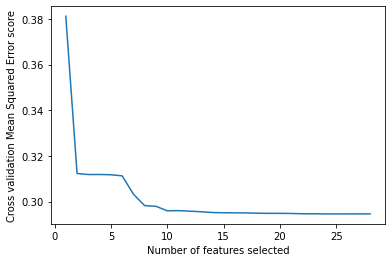

In [ ]:
print(f"Optimal number of features : {rfecv.n_features_}")

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Mean Squared Error score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), -rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([-0.38112284, -0.31232567, -0.31186583, -0.31188388, -0.31177705,
       -0.31129152, -0.30325749, -0.29825791, -0.29796323, -0.29599898,
       -0.29607986, -0.2958333 , -0.29558391, -0.29525019, -0.29513452,
       -0.29509043, -0.29508043, -0.29494276, -0.29488057, -0.29487546,
       -0.29482986, -0.29469718, -0.2946905 , -0.29463995, -0.29463398,
       -0.29464547, -0.29464798, -0.29464979])

In [ ]:
rfecv.fit(X_train_sc, y_train_sc)

RFECV(cv=10, estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [ ]:
# Make a dataframe with selected features
X_train_sc_rfecv = rfecv.transform(X_train_sc)

In [ ]:
X_train_sc_rfecv.shape

(41505, 25)

In [ ]:
rfecv.n_features_

25

In [ ]:
rfecv.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True])

In [ ]:
rfecv.ranking_

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 4, 1, 1, 1])

The cross-validation scores for the number of features selected show greater than 14 features selected show more than -0.296 negative mean squared error. Therefore, 14 number of features would be selected in Feature Selection.

#### Selecting 14 Features

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# Using linear regression algorithm to use for recursive feature elimination
linreg = LinearRegression()

In [ ]:
# Create RFE object and rank the features
rfe = RFE(estimator=linreg, n_features_to_select=14, step=1)

In [ ]:
rfe.fit(X_train_sc, y_train_sc)

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [ ]:
# For training set with selected features
X_train_sc_rfe = rfe.transform(X_train_sc)

In [ ]:
# For test set with selected features
X_test_sc_rfe = rfe.transform(X_test_sc)

In [ ]:
print("The dimension of the training set before feature selection was: ", X_train_sc.shape)

The dimension of the training set before feature selection was:  (41505, 28)


In [ ]:
print("The dimension of the test set after feature selection is: ", X_train_sc_rfe.shape)

The dimension of the test set after feature selection is:  (41505, 14)


In [ ]:
X_test_sc_rfe.shape

(17789, 14)

In [ ]:
rfe.ranking_

array([ 1, 14,  1,  1,  1,  1,  1,  1,  2, 10, 11,  1,  7,  8,  3, 12,  1,
        5,  1, 13,  1,  9,  4,  6, 15,  1,  1,  1])

In [ ]:
print(covid3_fct_X.columns[rfe.ranking_ == 1])

Index(['continent', 'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'population', 'gdp_per_capita',
       'cardiovasc_death_rate', 'female_smokers', 'month', 'day',
       'days_from_startdate'],
      dtype='object')


Therefore, the 14 selected features of 28 features are: 'continent', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population', 'gdp_per_capita', 'cardiovasc_death_rate', 'female_smokers', 'month', 'day', and 'days_from_startdate'.

### <a id='e2_ID'> Principal Component Analysis (PCA) </a> 

For Feature Extraction, Principal Component Analysis (PCA) is a linear diminsionality reduction method using singular value decompostion to reduce the feature dimensional space. 

In [ ]:
from sklearn import decomposition

#### Using 10 number of principal components

In [ ]:
np.random.seed(5)

In [ ]:
pca = decomposition.PCA(n_components=10)

In [ ]:
pca.fit(X_train_sc)

PCA(n_components=10)

In [ ]:
# For training set
X_train_sc_pca = pca.transform(X_train_sc)

In [ ]:
X_train_sc_pca

array([[-1.47143049,  0.28752777, -2.29007174, ..., -0.49229936,
        -1.39939143, -0.01860527],
       [ 4.07904365, -0.63918895, -1.08220599, ..., -0.3463373 ,
        -1.07786548,  0.13622363],
       [ 1.67767905, -0.3009004 , -1.32731272, ..., -1.86534173,
         1.21294399,  1.71788782],
       ...,
       [-1.13741132,  1.48827344, -1.08485216, ...,  1.09873063,
        -0.83246131,  1.52203641],
       [ 3.81643493, -0.12659342, -1.27169472, ..., -0.1629667 ,
        -0.84849228, -0.17574142],
       [ 3.11281934, -0.0284418 , -0.94779034, ..., -1.17212904,
         1.58859281, -0.95765595]])

In [ ]:
X_train_sc_pca.shape

(41505, 10)

In [ ]:
pca.explained_variance_ratio_

array([0.23792973, 0.11940562, 0.07523112, 0.06534425, 0.05587918,
       0.05223023, 0.04376883, 0.03882408, 0.03697653, 0.03585855])

In [ ]:
var_Data = pca.explained_variance_ratio_
# Culmulative Variance Explained
cum_var_Data = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var_Data

array([23.79, 35.73, 43.25, 49.78, 55.37, 60.59, 64.97, 68.85, 72.55,
       76.14])

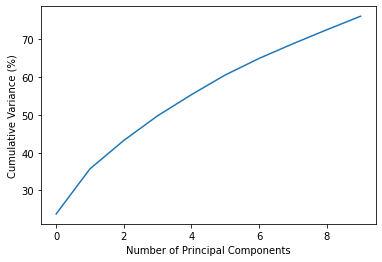

In [ ]:
plt.plot(cum_var_Data)
plt.ylabel('Cumulative Variance (%)')
plt.xlabel('Number of Principal Components')
plt.show()

In [ ]:
print("The dimension of the dataset before applying PCA was: ", X_train_sc.shape)

The dimension of the dataset before applying PCA was:  (41505, 28)


In [ ]:
print("The dimension of the dataset after applying PCA is: ", X_train_sc_pca.shape)

The dimension of the dataset after applying PCA is:  (41505, 10)


In [ ]:
# For test set
X_test_sc_pca = pca.transform(X_test_sc)

In [ ]:
X_test_sc_pca.shape

(17789, 10)

The 10 principal components captured 76.14% of the variance of the features in the training data.

## <a id='f_ID'> Regression Models </a>

### <a id='f1_ID'> Multilinear Regression </a>

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#### With RFE

In [ ]:
linear_regr_rfe = linear_model.LinearRegression()

In [ ]:
# Fit the model
linear_regr_rfe.fit(X_train_sc_rfe, y_train_sc)

LinearRegression()

In [ ]:
# R-squared score
linear_regr_rfe.score(X_train_sc_rfe, y_train_sc)

0.7086648813413623

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(linear_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='r2').mean())

0.7037381688858921


In [ ]:
# Mean Absolute Error
print(-cross_val_score(linear_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='neg_mean_absolute_error').mean())

0.15604225809677885


In [ ]:
# Mean Squared Error
print(-cross_val_score(linear_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='neg_mean_squared_error').mean())

0.2952433621470497


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(linear_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='neg_mean_squared_error')).mean())

0.541590549037857


In [ ]:
print('The coefficients are: \n', linear_regr_rfe.coef_)
print('The y-intercept is: \n', linear_regr_rfe.intercept_)

The coefficients are: 
 [[-0.01903103  0.53468493  0.30106751  0.07883893 -0.07653119 -0.05702683
   0.01865975  0.08694561  0.02007782  0.02389408  0.03462589 -2.75942517
  -0.26731227  2.80459855]]
The y-intercept is: 
 [1.92713033e-16]


In [ ]:
## Pair features with coefficients
list(zip(['continent', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
          'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population', 'gdp_per_capita',
          'cardiovasc_death_rate', 'female_smokers', 'month', 'day',  'days_from_startdate'], 
         ['-0.01903103',  '0.53468493',  '0.30106751',  '0.07883893', '-0.07653119', '-0.05702683', '0.01865975',
          '0.08694561',  '0.02007782',  '0.02389408',  '0.03462589', '-2.75942517', '-0.26731227',  '2.80459855']))

[('continent', '-0.01903103'),
 ('total_deaths', '0.53468493'),
 ('new_deaths', '0.30106751'),
 ('new_deaths_smoothed', '0.07883893'),
 ('total_deaths_per_million', '-0.07653119'),
 ('new_deaths_per_million', '-0.05702683'),
 ('new_deaths_smoothed_per_million', '0.01865975'),
 ('population', '0.08694561'),
 ('gdp_per_capita', '0.02007782'),
 ('cardiovasc_death_rate', '0.02389408'),
 ('female_smokers', '0.03462589'),
 ('month', '-2.75942517'),
 ('day', '-0.26731227'),
 ('days_from_startdate', '2.80459855')]

##### Predictions on Test Set

In [ ]:
y_linpred_rfe_sc = linear_regr_rfe.predict(X_test_sc_rfe)
y_linpred_rfe = sc_y.inverse_transform(y_linpred_rfe_sc)
y_linpred_rfe

array([[ 443.09341289],
       [ 485.55930361],
       [1163.51158903],
       ...,
       [ 230.86199953],
       [-618.30949164],
       [1916.34364637]])

In [ ]:
# Mean Absolute Error
print("MAE for linear regression was: %.2f" % metrics.mean_absolute_error(y_test, y_linpred_rfe))

MAE for linear regression was: 931.69


In [ ]:
# Mean Squared Error
print("MSE for linear regression was: %.2f" % metrics.mean_squared_error(y_test, y_linpred_rfe))

MSE for linear regression was: 10448166.12


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_linpred_rfe)))

RMSE was 3232.3623131747636


In [ ]:
# R-squared
print('Variance score (R2) for linear regression was: %.2f' % metrics.r2_score(y_test, y_linpred_rfe))

Variance score (R2) for linear regression was: 0.71


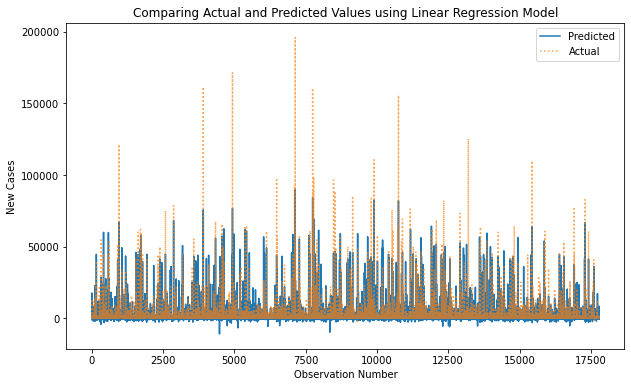

In [ ]:
# Plot Comparing Actual and Predicted Values using Linear Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_linpred_rfe, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using Linear Regression Model')
plt.legend()
plt.show()

#### With PCA

In [ ]:
linear_regr_pca = linear_model.LinearRegression()

In [ ]:
# Fit the model
linear_regr_pca.fit(X_train_sc_pca, y_train_sc)

LinearRegression()

In [ ]:
# R-squared score
linear_regr_pca.score(X_train_sc_pca, y_train_sc)

0.6717948445678306

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(linear_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='r2').mean())

0.6717005926175719


In [ ]:
# Mean Absolute Error
print(-cross_val_score(linear_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='neg_mean_absolute_error').mean())

0.18301637112760577


In [ ]:
# Mean Squared Error
print(-cross_val_score(linear_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='neg_mean_squared_error').mean())

0.32926104440040976


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(linear_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='neg_mean_squared_error')).mean())

0.5710315179636086


In [ ]:
print('The coefficients are: \n', linear_regr_pca.coef_)
print('The y-intercept is: \n', linear_regr_pca.intercept_)

The coefficients are: 
 [[ 0.09177261  0.33959818  0.20930403  0.12469329 -0.01279598 -0.24935357
   0.01561233 -0.12525497 -0.02812171  0.00429299]]
The y-intercept is: 
 [-1.45826021e-17]


In [ ]:
## Pair features with coefficients
list(zip(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], 
         ['0.09177261', '0.33959818', '0.20930403', '0.12469329', '-0.01279598', '-0.24935357', '0.01561233',
          '-0.12525497', '-0.02812171', '0.00429299']))

[('PC1', '0.09177261'),
 ('PC2', '0.33959818'),
 ('PC3', '0.20930403'),
 ('PC4', '0.12469329'),
 ('PC5', '-0.01279598'),
 ('PC6', '-0.24935357'),
 ('PC7', '0.01561233'),
 ('PC8', '-0.12525497'),
 ('PC9', '-0.02812171'),
 ('PC10', '0.00429299')]

##### Predictions on Test Set

In [ ]:
y_linpred_pca_sc = linear_regr_pca.predict(X_test_sc_pca)
y_linpred_pca = sc_y.inverse_transform(y_linpred_pca_sc)
y_linpred_pca

array([[  -43.90519659],
       [  -18.87760427],
       [  564.62778004],
       ...,
       [ -335.68200899],
       [-1099.8990578 ],
       [ 1803.69884652]])

In [ ]:
# Mean Absolute Error
print("MAE for linear regression was: %.2f" % metrics.mean_absolute_error(y_test, y_linpred_pca))

MAE for linear regression was: 1099.31


In [ ]:
# Mean Squared Error
print("MSE for linear regression was: %.2f" % metrics.mean_squared_error(y_test, y_linpred_pca))

MSE for linear regression was: 11810045.55


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_linpred_pca)))

RMSE was 3436.5746830708576


In [ ]:
# R-squared
print('Variance score (R2) for linear regression was: %.2f' % metrics.r2_score(y_test, y_linpred_pca))

Variance score (R2) for linear regression was: 0.67


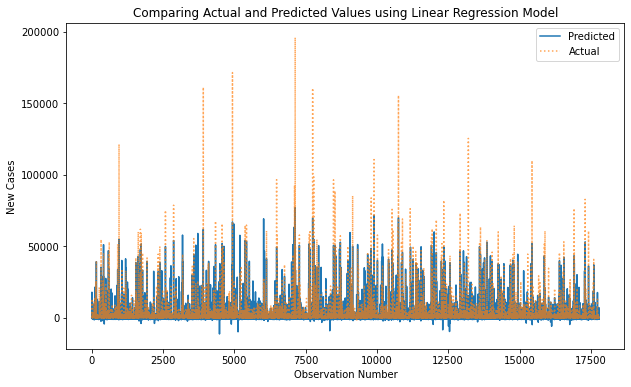

In [ ]:
# Plot Comparing Actual and Predicted Values using Linear Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_linpred_pca, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using Linear Regression Model')
plt.legend()
plt.show()

#### Without RFE or PCA

In [ ]:
linear_regr = linear_model.LinearRegression()

In [ ]:
# Fit the model
linear_regr.fit(X_train_sc, y_train_sc)

LinearRegression()

In [ ]:
# R-squared score
linear_regr.score(X_train_sc, y_train_sc)

0.7093323551327457

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(linear_regr, X_train_sc, y_train_sc, cv=10, scoring='r2').mean())

0.7043387731219461


In [ ]:
# Mean Absolute Error
print(-cross_val_score(linear_regr, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_absolute_error').mean())

0.15828012420651175


In [ ]:
# Mean Squared Error
print(-cross_val_score(linear_regr, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_squared_error').mean())

0.294649794443377


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(linear_regr, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_squared_error')).mean())

0.5410401715196921


In [ ]:
print('The coefficients are: \n', linear_regr.coef_)
print('The y-intercept is: \n', linear_regr.intercept_)

The coefficients are: 
 [[-1.89079900e-02 -1.53202412e-04  5.36375172e-01  3.00532528e-01
   7.91937652e-02 -7.81656292e-02 -5.71707919e-02  1.82173277e-02
   1.78358029e-02  7.68737899e-03  6.95609337e-03  8.60548125e-02
  -1.13531930e-02  1.98735201e-02 -3.17663367e-02 -3.74310795e-03
   1.91296507e-02  1.84236525e-02  2.45637042e-02  1.09587008e-03
   4.08835947e-02 -1.25393291e-02  1.85971079e-02  1.26523024e-02
   8.16907074e-05 -2.78458547e+00 -2.70010908e-01  2.83296953e+00]]
The y-intercept is: 
 [1.85350974e-16]


In [ ]:
## Pair features with coefficients
list(zip(list(covid3_fct_X.columns), 
         np.reshape(linear_regr.coef_, -1, 1)))

[('continent', -0.01890799001812003),
 ('location', -0.00015320241193858019),
 ('total_deaths', 0.53637517216965),
 ('new_deaths', 0.3005325279806393),
 ('new_deaths_smoothed', 0.07919376518775548),
 ('total_deaths_per_million', -0.07816562916528057),
 ('new_deaths_per_million', -0.05717079189978958),
 ('new_deaths_smoothed_per_million', 0.018217327680639526),
 ('reproduction_rate', 0.01783580293941605),
 ('tests_units', 0.007687378988822432),
 ('stringency_index', 0.006956093370839037),
 ('population', 0.08605481248186835),
 ('population_density', -0.011353193004871883),
 ('median_age', 0.01987352009442001),
 ('aged_65_older', -0.03176633669595702),
 ('aged_70_older', -0.0037431079491078378),
 ('gdp_per_capita', 0.019129650681286137),
 ('extreme_poverty', 0.01842365245731663),
 ('cardiovasc_death_rate', 0.024563704224843996),
 ('diabetes_prevalence', 0.0010958700763965448),
 ('female_smokers', 0.040883594713406475),
 ('male_smokers', -0.012539329093546783),
 ('hospital_beds_per_thousa

##### Predictions on Test Set

In [ ]:
y_linpred_sc = linear_regr.predict(X_test_sc)
y_linpred = sc_y.inverse_transform(y_linpred_sc)
y_linpred

array([[ 386.37198449],
       [ 304.71169319],
       [1425.42294793],
       ...,
       [ 101.97423061],
       [-485.02907143],
       [1857.98427745]])

In [ ]:
# Mean Absolute Error
print("MAE for linear regression was: %.2f" % metrics.mean_absolute_error(y_test, y_linpred))

MAE for linear regression was: 943.17


In [ ]:
# Mean Squared Error
print("MSE for linear regression was: %.2f" % metrics.mean_squared_error(y_test, y_linpred))

MSE for linear regression was: 10418001.98


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_linpred)))

RMSE was 3227.6929811149216


In [ ]:
# R-squared
print('Variance score (R2) for linear regression was: %.2f' % metrics.r2_score(y_test, y_linpred))

Variance score (R2) for linear regression was: 0.71


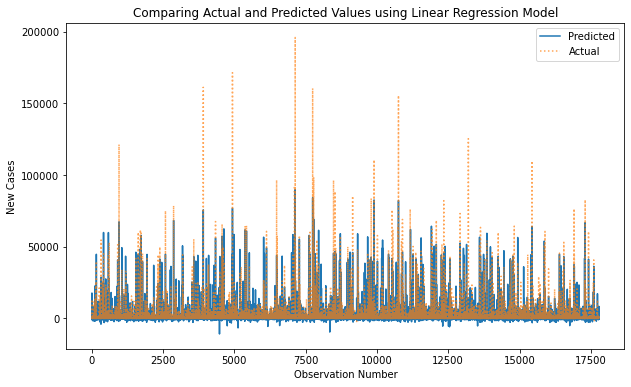

In [ ]:
# Plot Comparing Actual and Predicted Values using Linear Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_linpred, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using Linear Regression Model')
plt.legend()
plt.show()

The plots comparing the actual and predicted values showed the Multilinear Regression model underestimated the number of new cases for the records in the test set.

### <a id='f2_ID'> K-Nearest Neighbours (KNN) Regression </a>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#### With Recursive Feature Elimination

In [ ]:
neigh_regr_rfe = KNeighborsRegressor(n_neighbors=5) # weights='uniform', distance='minkowski'

In [ ]:
# Fit the model
neigh_regr_rfe.fit(X_train_sc_rfe, y_train_sc)

KNeighborsRegressor()

In [ ]:
# R-squared score
neigh_regr_rfe.score(X_train_sc_rfe, y_train_sc)

0.9730837193537559

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(neigh_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='r2').mean())

0.9535577134161028


In [ ]:
# Mean Absolute Error
print(-cross_val_score(neigh_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='neg_mean_absolute_error').mean())

0.0355468732079709


In [ ]:
# Mean Squared Error
print(-cross_val_score(neigh_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='neg_mean_squared_error').mean())

0.045870204285229914


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(neigh_regr_rfe, X_train_sc_rfe, y_train_sc, cv=10, scoring='neg_mean_squared_error')).mean())

0.21107469779088647


#### Predictions on Test Set

In [ ]:
y_neighpred_rfe_sc = neigh_regr_rfe.predict(X_test_sc_rfe)
y_neighpred_rfe = sc_y.inverse_transform(y_neighpred_rfe_sc)
y_neighpred_rfe

array([[  76.4],
       [ 543.6],
       [ 359.4],
       ...,
       [  17.2],
       [   7.4],
       [1125.6]])

In [ ]:
# Mean Absolute Error
print("MAE for kNN regression was: %.2f" % metrics.mean_absolute_error(y_test, y_neighpred_rfe))

MAE for kNN regression was: 200.98


In [ ]:
# Mean Squared Error
print("MSE for kNN regression was: %.2f" % metrics.mean_squared_error(y_test, y_neighpred_rfe))

MSE for kNN regression was: 1794229.99


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_neighpred_rfe)))

RMSE was 1339.488704709575


In [ ]:
# R-squared
print('Variance score (R2) for kNN regression was: %.2f' % metrics.r2_score(y_test, y_neighpred_rfe))

Variance score (R2) for kNN regression was: 0.95


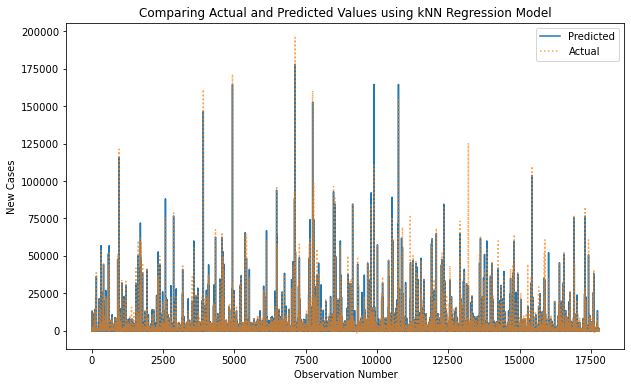

In [ ]:
# Plot Comparing Actual and Predicted Values using KNN Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_neighpred_rfe, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using kNN Regression Model')
plt.legend()
plt.show()

#### With PCA

In [ ]:
neigh_regr_pca = KNeighborsRegressor(n_neighbors=5) # weights='uniform', distance='minkowski'

In [ ]:
# Fit the model
neigh_regr_pca.fit(X_train_sc_pca, y_train_sc)

KNeighborsRegressor()

In [ ]:
# R-squared score
neigh_regr_pca.score(X_train_sc_pca, y_train_sc)

0.968099046515214

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(neigh_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='r2').mean())

0.9459593138169602


In [ ]:
# Mean Absolute Error
print(-cross_val_score(neigh_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='neg_mean_absolute_error').mean())

0.03657657120745106


In [ ]:
# Mean Squared Error
print(-cross_val_score(neigh_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='neg_mean_squared_error').mean())

0.05335533843742134


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(neigh_regr_pca, X_train_sc_pca, y_train_sc, cv=10, scoring='neg_mean_squared_error')).mean())

0.2282474151207691


#### Predictions on Test Set

In [ ]:
y_neighpred_pca_sc = neigh_regr_pca.predict(X_test_sc_pca)
y_neighpred_pca = sc_y.inverse_transform(y_neighpred_pca_sc)
y_neighpred_pca

array([[  76.4],
       [ 543.6],
       [ 366.2],
       ...,
       [  14.8],
       [   0. ],
       [1125.6]])

In [ ]:
# Mean Absolute Error
print("MAE for kNN regression was: %.2f" % metrics.mean_absolute_error(y_test, y_neighpred_pca))

MAE for kNN regression was: 217.31


In [ ]:
# Mean Squared Error
print("MSE for kNN regression was: %.2f" % metrics.mean_squared_error(y_test, y_neighpred_pca))

MSE for kNN regression was: 2099373.63


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_neighpred_pca)))

RMSE was 1448.9215417000798


In [ ]:
# R-squared
print('Variance score (R2) for kNN regression was: %.2f' % metrics.r2_score(y_test, y_neighpred_pca))

Variance score (R2) for kNN regression was: 0.94


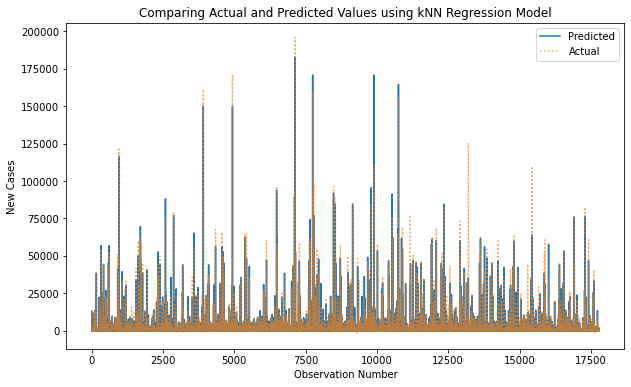

In [ ]:
# Plot Comparing Actual and Predicted Values using kNN Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_neighpred_pca, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using kNN Regression Model')
plt.legend()
plt.show()

#### Without RFE or PCA

In [ ]:
neigh_regr = KNeighborsRegressor(n_neighbors=5) # weights='uniform', distance='minkowski'

In [ ]:
# Fit the model
neigh_regr.fit(X_train_sc, y_train_sc)

KNeighborsRegressor()

In [ ]:
# R-squared score
neigh_regr.score(X_train_sc, y_train_sc)

0.9740037496754609

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(neigh_regr, X_train_sc, y_train_sc, cv=10, scoring='r2').mean())

0.9527810580121372


In [ ]:
# Mean Absolute Error
print(-cross_val_score(neigh_regr, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_absolute_error').mean())

0.03400614660555274


In [ ]:
# Mean Squared Error
print(-cross_val_score(neigh_regr, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_squared_error').mean())

0.04660798989503927


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(neigh_regr, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_squared_error')).mean())

0.21253107632028337


#### Predictions on Test Set

In [ ]:
y_neighpred_sc = neigh_regr.predict(X_test_sc)
y_neighpred = sc_y.inverse_transform(y_neighpred_sc)
y_neighpred

array([[  76.4],
       [ 543.6],
       [ 508.4],
       ...,
       [  11.4],
       [   0. ],
       [1207.6]])

In [ ]:
# Mean Absolute Error
print("MAE for kNN regression was: %.2f" % metrics.mean_absolute_error(y_test, y_neighpred))

MAE for kNN regression was: 194.45


In [ ]:
# Mean Squared Error
print("MSE for kNN regression was: %.2f" % metrics.mean_squared_error(y_test, y_neighpred))

MSE for kNN regression was: 1811111.76


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_neighpred)))

RMSE was 1345.7755251474598


In [ ]:
# R-squared
print('Variance score (R2) for kNN regression was: %.2f' % metrics.r2_score(y_test, y_neighpred))

Variance score (R2) for kNN regression was: 0.95


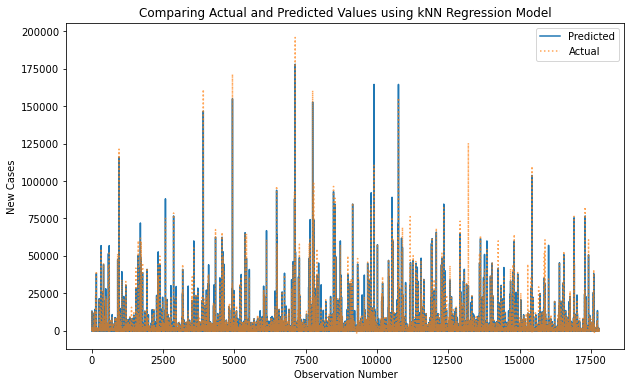

In [ ]:
# Plot Comparing Actual and Predicted Values using kNN Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_neighpred, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using kNN Regression Model')
plt.legend()
plt.show()

The plots comparing the actual and predicted values for KNN Regression model better estimated the number of new cases for the records in the test set compared to the Multilinear Regression model.

### <a id='f3_ID'> Support Vector Machine (SVM) Regression </a>

In [ ]:
from sklearn.svm import SVR

#### With RFE

In [ ]:
svr_rfe = SVR(kernel='rbf', gamma = 'auto') # C=1.0, episolon=0.1

In [ ]:
# Fit the model
svr_rfe.fit(X_train_sc_rfe, np.reshape(y_train_sc,(-1,1)))

SVR(gamma='auto')

In [ ]:
# R-squared score
svr_rfe.score(X_train_sc_rfe, y_train_sc)

0.815601433123581

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(svr_rfe, X_train_sc_rfe, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='r2').mean())

0.7913609806849884


In [ ]:
# Mean Absolute Error
print(-cross_val_score(svr_rfe, X_train_sc_rfe, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_absolute_error'
                      ).mean())

0.08061049734356825


In [ ]:
# Mean Squared Error
print(-cross_val_score(svr_rfe, X_train_sc_rfe, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_squared_error'
                      ).mean())

0.2158422789591003


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(svr_rfe, X_train_sc_rfe, np.reshape(y_train_sc,(-1,1)), cv=10, 
                               scoring='neg_mean_squared_error')).mean())

0.44869519097663735


In [ ]:
svr_rfe.support_

array([   12,    66,    91, ..., 41493, 41503, 41504])

In [ ]:
svr_rfe.support_vectors_

array([[ 1.01023988,  1.26918759,  7.94808118, ..., -0.12204439,
         0.56106165, -0.0679716 ],
       [ 0.31014627,  2.7369679 ,  3.99328499, ...,  1.55781643,
         0.89966146,  1.6517579 ],
       [ 1.01023988,  7.46574307,  3.68126951, ..., -0.12204439,
        -0.90620422, -0.21128239],
       ...,
       [ 0.31014627, -0.16143288, -0.03171468, ..., -0.45801655,
         0.22246183, -0.44278443],
       [ 0.31014627, -0.05438833, -0.10971855, ...,  1.22184426,
        -0.11613798,  1.21080162],
       [ 1.71033348, -0.1461792 , -0.12531933, ...,  0.8858721 ,
        -1.13193743,  0.78086924]])

#### Predictions on Test Set

In [ ]:
svr_rfe.score(X_train_sc_rfe, y_train_sc)

0.815601433123581

In [ ]:
y_svrpred_rfe_sc = svr_rfe.predict(X_test_sc_rfe)
y_svrpred_rfe = sc_y.inverse_transform(y_svrpred_rfe_sc)
y_svrpred_rfe

array([ 492.75155187,  878.68005562,  357.08103735, ...,  362.97671644,
       -241.39151896,  497.86489611])

In [ ]:
# Mean Absolute Error
print("MAE for SVM regression was: %.2f" % metrics.mean_absolute_error(y_test, y_svrpred_rfe))

MAE for SVM regression was: 481.78


In [ ]:
# Mean Squared Error
print("MSE for SVM regression was: %.2f" % metrics.mean_squared_error(y_test, y_svrpred_rfe))

MSE for SVM regression was: 7302010.51


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_svrpred_rfe)))

RMSE was 2702.2232536227584


In [ ]:
# R-squared
print('Variance score (R2) for SVM regression was: %.2f' % metrics.r2_score(y_test, y_svrpred_rfe))

Variance score (R2) for SVM regression was: 0.80


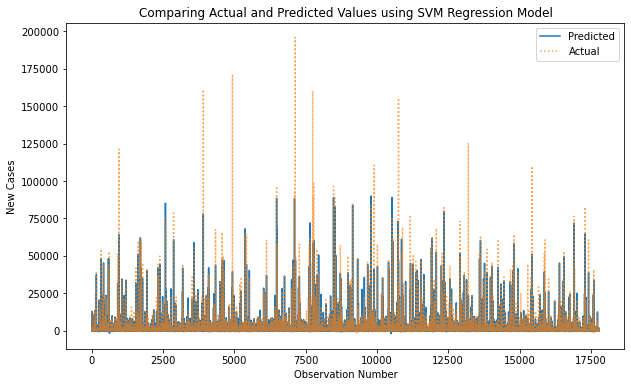

In [ ]:
# Plot Comparing Actual and Predicted Values using SVM Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_svrpred_rfe, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using SVM Regression Model')
plt.legend()
plt.show()

#### With PCA

In [ ]:
svr_pca = SVR(kernel='rbf', gamma = 'auto') # C=1.0, episolon=0.1

In [ ]:
# Fit the model
svr_pca.fit(X_train_sc_pca, np.reshape(y_train_sc,(-1,1)))

SVR(gamma='auto')

In [ ]:
# R-squared score
svr_pca.score(X_train_sc_pca, y_train_sc)

0.825087065330506

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(svr_pca, X_train_sc_pca, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='r2').mean())

0.8018604495283561


In [ ]:
# Mean Absolute Error
print(-cross_val_score(svr_pca, X_train_sc_pca, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_absolute_error'
                      ).mean())

0.07946962881872546


In [ ]:
# Mean Squared Error
print(-cross_val_score(svr_pca, X_train_sc_pca, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_squared_error'
                      ).mean())

0.20329686274719333


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(svr_pca, X_train_sc_pca, np.reshape(y_train_sc,(-1,1)), cv=10, 
                               scoring='neg_mean_squared_error')).mean())

0.4382348733254888


In [ ]:
svr_pca.support_

array([   12,    23,    48, ..., 41485, 41489, 41493])

In [ ]:
svr_pca.support_vectors_

array([[ 2.90031337,  7.9122797 ,  4.14763987, ...,  1.70152252,
        -0.12791593,  0.28193521],
       [ 3.44228463,  3.39954568, -0.38519696, ...,  0.09666368,
        -0.76242182, -0.59106259],
       [ 3.86249211,  2.85918436, -0.51894109, ...,  0.12381577,
         0.12607324,  0.57738893],
       ...,
       [ 4.38988993,  0.22697062, -0.16641569, ..., -0.99217147,
        -1.94482191,  0.79251908],
       [ 2.50651295, -0.05534952, -2.36346722, ...,  0.93488325,
        -1.51738698, -1.21196717],
       [ 1.66980429, -1.28842063, -0.51299101, ...,  1.49165936,
        -0.98266462,  0.10261975]])

#### Predictions on Test Set

In [ ]:
svr_pca.score(X_train_sc_pca, y_train_sc)

0.825087065330506

In [ ]:
y_svrpred_pca_sc = svr_pca.predict(X_test_sc_pca)
y_svrpred_pca = sc_y.inverse_transform(y_svrpred_pca_sc)
y_svrpred_pca

array([309.5997119 , 812.73366908, 512.34678827, ..., 568.80333697,
       304.86833059, 560.0465636 ])

In [ ]:
# Mean Absolute Error
print("MAE for SVM regression was: %.2f" % metrics.mean_absolute_error(y_test, y_svrpred_pca))

MAE for SVM regression was: 480.34


In [ ]:
# Mean Squared Error
print("MSE for SVM regression was: %.2f" % metrics.mean_squared_error(y_test, y_svrpred_pca))

MSE for SVM regression was: 6583063.82


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_svrpred_pca)))

RMSE was 2565.748199762972


In [ ]:
# R-squared
print('Variance score (R2) for SVM regression was: %.2f' % metrics.r2_score(y_test, y_svrpred_pca))

Variance score (R2) for SVM regression was: 0.82


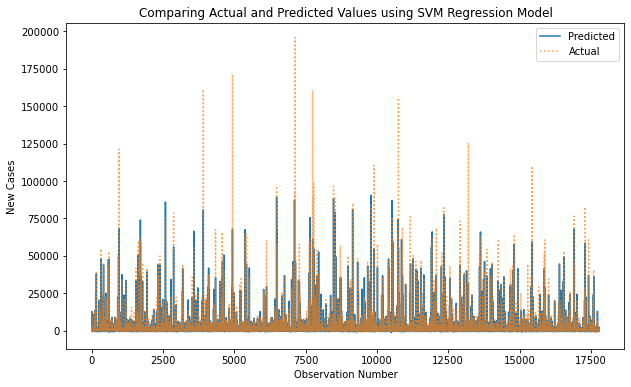

In [ ]:
# Plot Comparing Actual and Predicted Values using SVM Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_svrpred_pca, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using SVM Regression Model')
plt.legend()
plt.show()

#### Without RFE or PCA

In [ ]:
svr = SVR(kernel='rbf', gamma = 'auto') # C=1.0, episolon=0.1

In [ ]:
# Fit the model
svr.fit(X_train_sc, np.reshape(y_train_sc,(-1,1)))

SVR(gamma='auto')

In [ ]:
# R-squared score
svr.score(X_train_sc, y_train_sc)

0.842013406493652

##### Cross-Validation Scores for Training Set

In [ ]:
# R-squared score
print(cross_val_score(svr, X_train_sc, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='r2').mean())

0.8229351951579265


In [ ]:
# Mean Absolute Error
print(-cross_val_score(svr, X_train_sc, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_absolute_error').mean())

0.07669702258315583


In [ ]:
# Mean Squared Error
print(-cross_val_score(svr, X_train_sc, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_squared_error').mean())

0.18285724446384305


In [ ]:
# Root Mean Squared Error
print(np.sqrt(-cross_val_score(svr, X_train_sc, np.reshape(y_train_sc,(-1,1)), cv=10, scoring='neg_mean_squared_error'
                              )).mean())

0.4135847879249105


In [ ]:
svr.support_

array([   12,    66,    79, ..., 41489, 41493, 41503])

In [ ]:
svr.support_vectors_

array([[ 1.01023988,  0.28238213,  1.26918759, ..., -0.12204439,
         0.56106165, -0.0679716 ],
       [ 0.31014627,  1.15671923,  2.7369679 , ...,  1.55781643,
         0.89966146,  1.6517579 ],
       [ 0.31014627,  1.24779601,  0.2330797 , ...,  1.55781643,
         0.67392825,  1.62971008],
       ...,
       [ 0.31014627,  0.95635031, -0.13824997, ...,  1.55781643,
        -1.01907082,  1.46435148],
       [ 0.31014627,  1.48459564, -0.16143288, ..., -0.45801655,
         0.22246183, -0.44278443],
       [ 0.31014627,  0.73776604, -0.05438833, ...,  1.22184426,
        -0.11613798,  1.21080162]])

#### Predictions on Test Set

In [ ]:
svr.score(X_train_sc, y_train_sc)

0.842013406493652

In [ ]:
y_svrpred_sc = svr.predict(X_test_sc)
y_svrpred = sc_y.inverse_transform(y_svrpred_sc)
y_svrpred

array([ 640.85360074,  960.24533624,  264.2480153 , ..., -170.71395805,
       -380.96950155,  620.80915344])

In [ ]:
# Mean Absolute Error
print("MAE for SVM regression was: %.2f" % metrics.mean_absolute_error(y_test, y_svrpred))

MAE for SVM regression was: 461.44


In [ ]:
# Mean Squared Error
print("MSE for SVM regression was: %.2f" % metrics.mean_squared_error(y_test, y_svrpred))

MSE for SVM regression was: 6040364.40


In [ ]:
# Root Mean Squared Error
print("RMSE was", np.sqrt(metrics.mean_squared_error(y_test, y_svrpred)))

RMSE was 2457.715280793776


In [ ]:
# R-squared
print('Variance score (R2) for SVM regression was: %.2f' % metrics.r2_score(y_test, y_svrpred))

Variance score (R2) for SVM regression was: 0.83


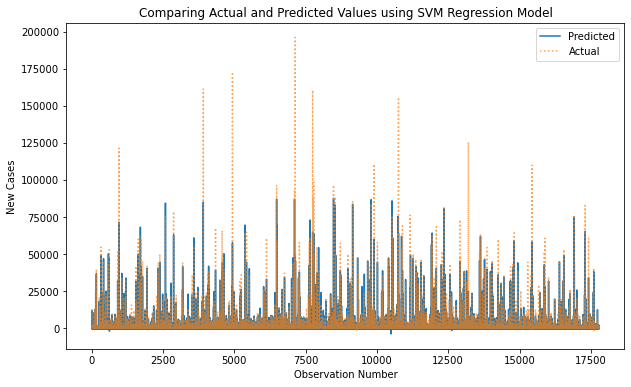

In [ ]:
# Plot Comparing Actual and Predicted Values using SVM Regression Model
plt.figure(figsize=(10, 6))
plt.plot(y_svrpred, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7, linestyle=':')
plt.ylabel('New Cases')
plt.xlabel('Observation Number')
plt.title('Comparing Actual and Predicted Values using SVM Regression Model')
plt.legend()
plt.show()

The plots comparing the actual and predicted values showed the SVM Regression model underestimated the number of new cases for the records in the test set.

## <a id='g_ID'> Evaluation of Regression Models </a>

### Training Cross-Validation Scores for Regression Models

In [ ]:
training_cv_scores = [[0.15604225809677885, 0.2952433621470497, 0.541590549037857, 0.7037381688858921], 
[0.18301637112760577, 0.32926104440040976, 0.5710315179636086, 0.6717005926175719], 
[0.15828012420651175, 0.294649794443377, 0.5410401715196921, 0.7043387731219461], 
[0.0355468732079709, 0.045870204285229914, 0.21107469779088647, 0.9535577134161028], 
[0.03657657120745106, 0.05335533843742134, 0.2282474151207691, 0.9459593138169602],
[0.03400614660555274, 0.04660798989503927, 0.21253107632028337, 0.9527810580121372],
[0.08061049734356825, 0.2158422789591003, 0.44869519097663735, 0.7913609806849884],
[0.07946962881872546, 0.20329686274719333, 0.4382348733254888, 0.8018604495283561],                 
[0.07669702258315583, 0.18285724446384305, 0.4135847879249105, 0.8229351951579265]]
columns1 = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared']
index1 = ['Multilinear Regression+RFE', 'Multilinear Regression+PCA', 'Multilinear Regression', 'KNN Regression+RFE', 
          'KNN Regression+PCA', 'KNN Regression', 'SVM Regression+RFE', 'SVM Regression+PCA', 'SVM Regression']

In [ ]:
training_cv_scores_df = pd.DataFrame(training_cv_scores, columns=columns1, index=index1)
training_cv_scores_df

Mean Absolute Error  Mean Squared Error  \
Multilinear Regression+RFE             0.156042            0.295243   
Multilinear Regression+PCA             0.183016            0.329261   
Multilinear Regression                 0.158280            0.294650   
KNN Regression+RFE                     0.035547            0.045870   
KNN Regression+PCA                     0.036577            0.053355   
KNN Regression                         0.034006            0.046608   
SVM Regression+RFE                     0.080610            0.215842   
SVM Regression+PCA                     0.079470            0.203297   
SVM Regression                         0.076697            0.182857   

                            Root Mean Squared Error  R-squared  
Multilinear Regression+RFE                 0.541591   0.703738  
Multilinear Regression+PCA                 0.571032   0.671701  
Multilinear Regression                     0.541040   0.704339  
KNN Regression+RFE                         0.211075   0.953558  
KNN Regression+PCA                         0.228247   0.945959  
KNN Regression                             0.212531   0.952781  
SVM Regression+RFE                         0.448695   0.791361  
SVM Regression+PCA                         0.438235   0.801860  
SVM Regression                             0.413585   0.822935

#### Visualizing Regression Models' Training Performance

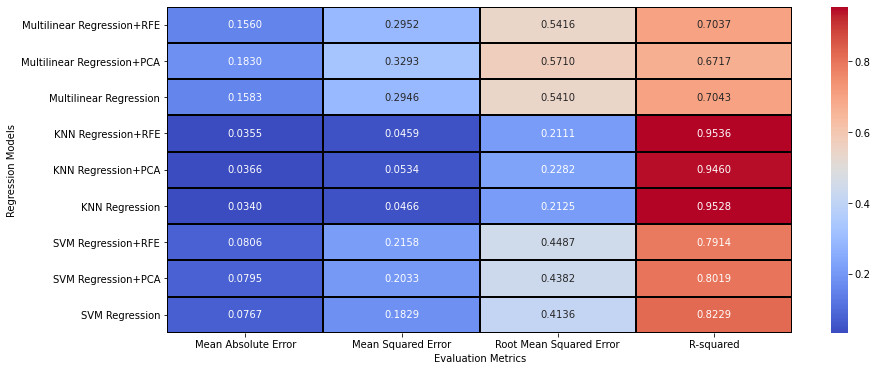

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(training_cv_scores_df, annot=True, fmt='.4f', cbar=True,
            xticklabels = columns1, cmap="coolwarm", linecolor='black', linewidths=1,
            yticklabels = index1)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Regression Models')
plt.show()

For Mean Absolute Error (MAE), the higher performing model was KNN Regression (0.0340), KNN Regression+RFE (0.0355), KNN Regression+PCA (0.0366), SVM Regression (0.0767), SVM Regression+PCA (0.0795), SVM Regression+RFE (0.0806), Multilinear Regression+RFE (0.1560), Multilinear Regression (0.1583), and Multilinear Regression+PCA (0.1830).  For Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), the order of model performance were: KNN Regression, KNN Regression+RFE, KNN Regression+PCA, SVM Regression, SVM Regression+PCA, SVM Regression+RFE, Multilinear Regression, Multilinear Regression+RFE, and Multilinear Regression+PCA. R-squared (R2) showed KNN Regression+RFE captured the explained the most variance with 0.9536, followed by KNN Regression, KNN Regression+PCA, SVM Regression (0.8229), SVM Regression+PCA, SVM Regression+RFE,  Multilinear Regression (0.7043), Multilinear Regression +RFE, and Multilinear Regression+PCA.

### Evaluation of Regression Models on Test Set

In [ ]:
test_scores = [[931.69, 10448166.12, 3232.3623131747636, 0.71], 
    [1099.31, 11810045.55, 3436.5746830708576, 0.67], 
    [943.17, 10418001.98, 3227.6929811149216, 0.71], 
    [200.98, 1794229.99, 1339.488704709575, 0.95], 
    [217.31, 2099373.63, 1448.9215417000798, 0.94],
    [194.45, 1811111.76, 1345.77552514745986, 0.95],
    [481.78, 7302010.51, 2702.2232536227584, 0.80],
    [480.34, 6583063.82, 2565.748199762972, 0.82],                 
    [461.44, 6040364.40, 2457.715280793776, 0.83]]
columns2 = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared']
index2 = ['Multilinear Regression+RFE', 'Multilinear Regression+PCA', 'Multilinear Regression', 'KNN Regression+RFE', 
          'KNN Regression+PCA', 'KNN Regression', 'SVM Regression+RFE', 'SVM Regression+PCA', 'SVM Regression']


In [ ]:
test_scores_df = pd.DataFrame(test_scores, columns=columns2, index=index2)
test_scores_df

Mean Absolute Error  Mean Squared Error  \
Multilinear Regression+RFE               931.69         10448166.12   
Multilinear Regression+PCA              1099.31         11810045.55   
Multilinear Regression                   943.17         10418001.98   
KNN Regression+RFE                       200.98          1794229.99   
KNN Regression+PCA                       217.31          2099373.63   
KNN Regression                           194.45          1811111.76   
SVM Regression+RFE                       481.78          7302010.51   
SVM Regression+PCA                       480.34          6583063.82   
SVM Regression                           461.44          6040364.40   

                            Root Mean Squared Error  R-squared  
Multilinear Regression+RFE              3232.362313       0.71  
Multilinear Regression+PCA              3436.574683       0.67  
Multilinear Regression                  3227.692981       0.71  
KNN Regression+RFE                      1339.488705       0.95  
KNN Regression+PCA                      1448.921542       0.94  
KNN Regression                          1345.775525       0.95  
SVM Regression+RFE                      2702.223254       0.80  
SVM Regression+PCA                      2565.748200       0.82  
SVM Regression                          2457.715281       0.83

#### Visualizing Regression Models' Performance

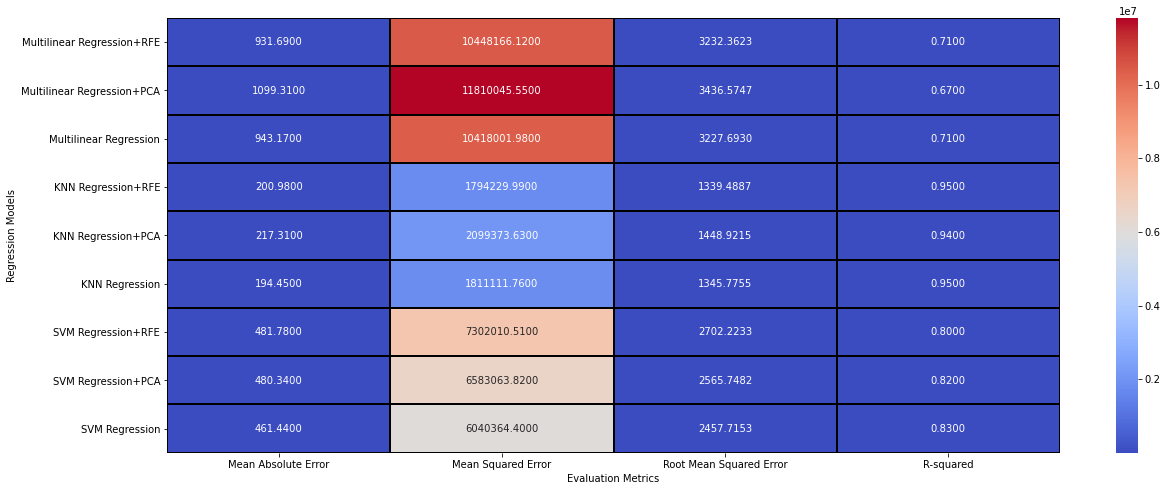

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(test_scores_df, annot=True, fmt='.4f', cbar=True,
            xticklabels = columns2, cmap="coolwarm", linecolor='black', linewidths=1,
            yticklabels = index2)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Regression Models')
plt.show()

Evaluating the regression models using the test set, had larger errors becuase the actual number of new cases for some record were greatly larger than the predicted number of new cases.  For MAE, the order of regression model performances were: KNN Regression (194.45), KNN Regression+RFE (200.98), KNN Regression+PCA (217.31), SVM Regression (461.44), SVM Regression+PCA (480.34), SVM Regression+RFE (481.78), Multilinear Regression+RFE (931.69), Multilinear Regression (943.17), and Multilinear Regression+PCA (1099.31), when KNN regression models performed much better, followed by SVM models, and Multilinear regression models showed higher errors.  MSE and RMSE showed again KNN models performed better than SVM and Multilinear regression models.  The order of model performance were: KNN Regression+RFE, KNN Regression, KNN Regression+PCA, SVM Regression, SVM Regression+PCA, SVM Regression+RFE, Multilinear Regression, Multilinear Regression+RFE, and Multilinear Regression+PCA with large MSEs and RMSEs. R2 showed KNN Regression+RFE and KNN Regression captured the explained the most variance with 0.9500, followed by KNN Regression+PCA (0.9400), SVM Regression (0.8300), SVM Regression+PCA (0.8200), SVM Regression+RFE (0.800),  Multilinear Regression and Multilinear Regression+RFE (0.7100), and Multilinear Regression+PCA (0.6700). Using KNN with RFE and without RFE or PCA performed simliarly and better than KNN regression with PCA.  SVM regression had better results without RFE or PCA than with PCA and RFE. Multilinear regression performed better with RFE and without RFE or PCA compared to with PCA.  Overall, the MAE showed around 190-220 new cases for the KNN regression models, around 460-480 for SVM, and 930-110 new cases for Mutlilinear models.

## <a id='h_ID'> Conclusion </a>

Since training the KNN and Multilinear regression models using RFE showed similar results to when training the models without RFE or PCA, the 14 features selected using RFE, 'continent', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population', 'gdp_per_capita', 'cardiovasc_death_rate', 'female_smokers', 'month', 'day', 'days_from_startdate', were important features that helped predict the 'new_cases' target variable.  This makes sense becuase information related to number of deaths and dates could help indicate the range of new cases for a specified time and location.  Interestingly, 'gdp_per_capita', 'cardiovasc_death_rate', and 'female_smokers' were selected to also help prediit the number of new cases.  Overall, the MAE showed around 190-220 new cases for the KNN regression models, around 460-480 for SVM, and 930-110 new cases for Mutlilinear models, where the order of model performances in terms of MAE were KNN Regression, KNN Regression+RFE, KNN Regression+PCA, SVM Regression, SVM Regression+PCA, SVM Regression+RFE, Multilinear Regression+RFE, Multilinear Regression, and Multilinear Regression+PCA. R2 showed KNN Regression captured the explained the most variance with 0.94-0.95, SVM Regression with 0.80-0.83, and Multilinear Regression with 0.67-0.71. Although KNN regression models overall performed better than SVM and Mulitlinear regression models, the regression models to predict the number of new cases for a specific date and country or continent for this COVID-19 dataset could be improved.  Domain knowledge could help improve these models and time series analysis could also help improve the models' predictions.